In [1]:
#import all the libraries needed
from imports import *
# import my functions
from function_store import *

# CPW Memristor 1 - Bias T Experiment EEE (James)

### Import Data

In [2]:
### Define the path to director from previous experiment
directory_1 = ('/Users/horatiocox/Desktop/VNA_Analysis/CPW_mem_oscillator_220524/Memristor/')
# Import the data from the VNA files
s2p_files_1 = import_data(directory_1)
# Remove duplicate frequency points from all the thru data to prevent errors with skrf functions
s2p_files_1 = duplicate_check(s2p_files_1)


### Define the path to the directory containing the new VNA data
directory_2 = ('/Users/horatiocox/Desktop/VNA_Analysis/CPW_mem_James_161024/')
# Import the data from the VNA files
s2p_files_2 = import_data(directory_2)
print(s2p_files_2)
# Remove duplicate frequency points from all the thru data to prevent errors with skrf functions
s2p_files_2 = duplicate_check(s2p_files_2)




/Users/horatiocox/Desktop/VNA_Analysis/VNAenv/lib/python3.9/site-packages/skrf/frequency.py:273: InvalidFrequencyWarning: Frequency values are not monotonously increasing!
To get rid of the invalid values call `drop_non_monotonic_increasing`
  temp_freq.check_monotonic_increasing()


1 run1_r0c0_thru Wafer0_r0_c0_ISS_thru_LRM+.S2P
2 run2_r10c1_thru Wafer2_r10_c1_thru.S2P
3 run3_r10c2_thru Wafer2_r10_c2_thru.S2P
4 run4_r10c3_thru Wafer2_r10_c3_thru.S2P
5 run5_r10c4_thru Wafer2_r10_c4_thru.S2P
6 run6_r10c5_open Wafer2_r10_c5_open.S2P
7 run7_r10c6_open Wafer2_r10_c6_open.S2P
8 run8_r10c7_opennarrow Wafer2_r10_c7_opennarrow.S2P
9 run9_r10c8_openverynarrow Wafer2_r10_c8_openverynarrow.S2P
10 run10_r10c9_opensig Wafer2_r10_c9_opensig.S2P
11 run11_r10c10_opensig Wafer2_r10_c10_opensig.S2P
12 run12_r10c11_short Wafer2_r10_c11_short.S2P
13 run13_r10c12_short Wafer2_r10_c12_short.S2P
14 run14_r10c13_thrunotaper Wafer2_r10_c13_thrunotaper.S2P
15 run15_r10c14_thrunotaper Wafer2_r10_c14_thrunotaper.S2P
16 run16_r10c15_opennotaper Wafer2_r10_c15_opennotaper.S2P
17 run17_r10c16_opennotaper Wafer2_r10_c16_opennotaper.S2P
18 run18_r10c17_opensignotaper Wafer2_r10_c17_opensignotaper.S2P
19 run19_r10c18_opensignotaper Wafer2_r10_c18_opensignotaper.S2P
20 run20_r10c19_shortnotaper Waf

### Plot Raw S-Params

### Now Focusing in on the S21

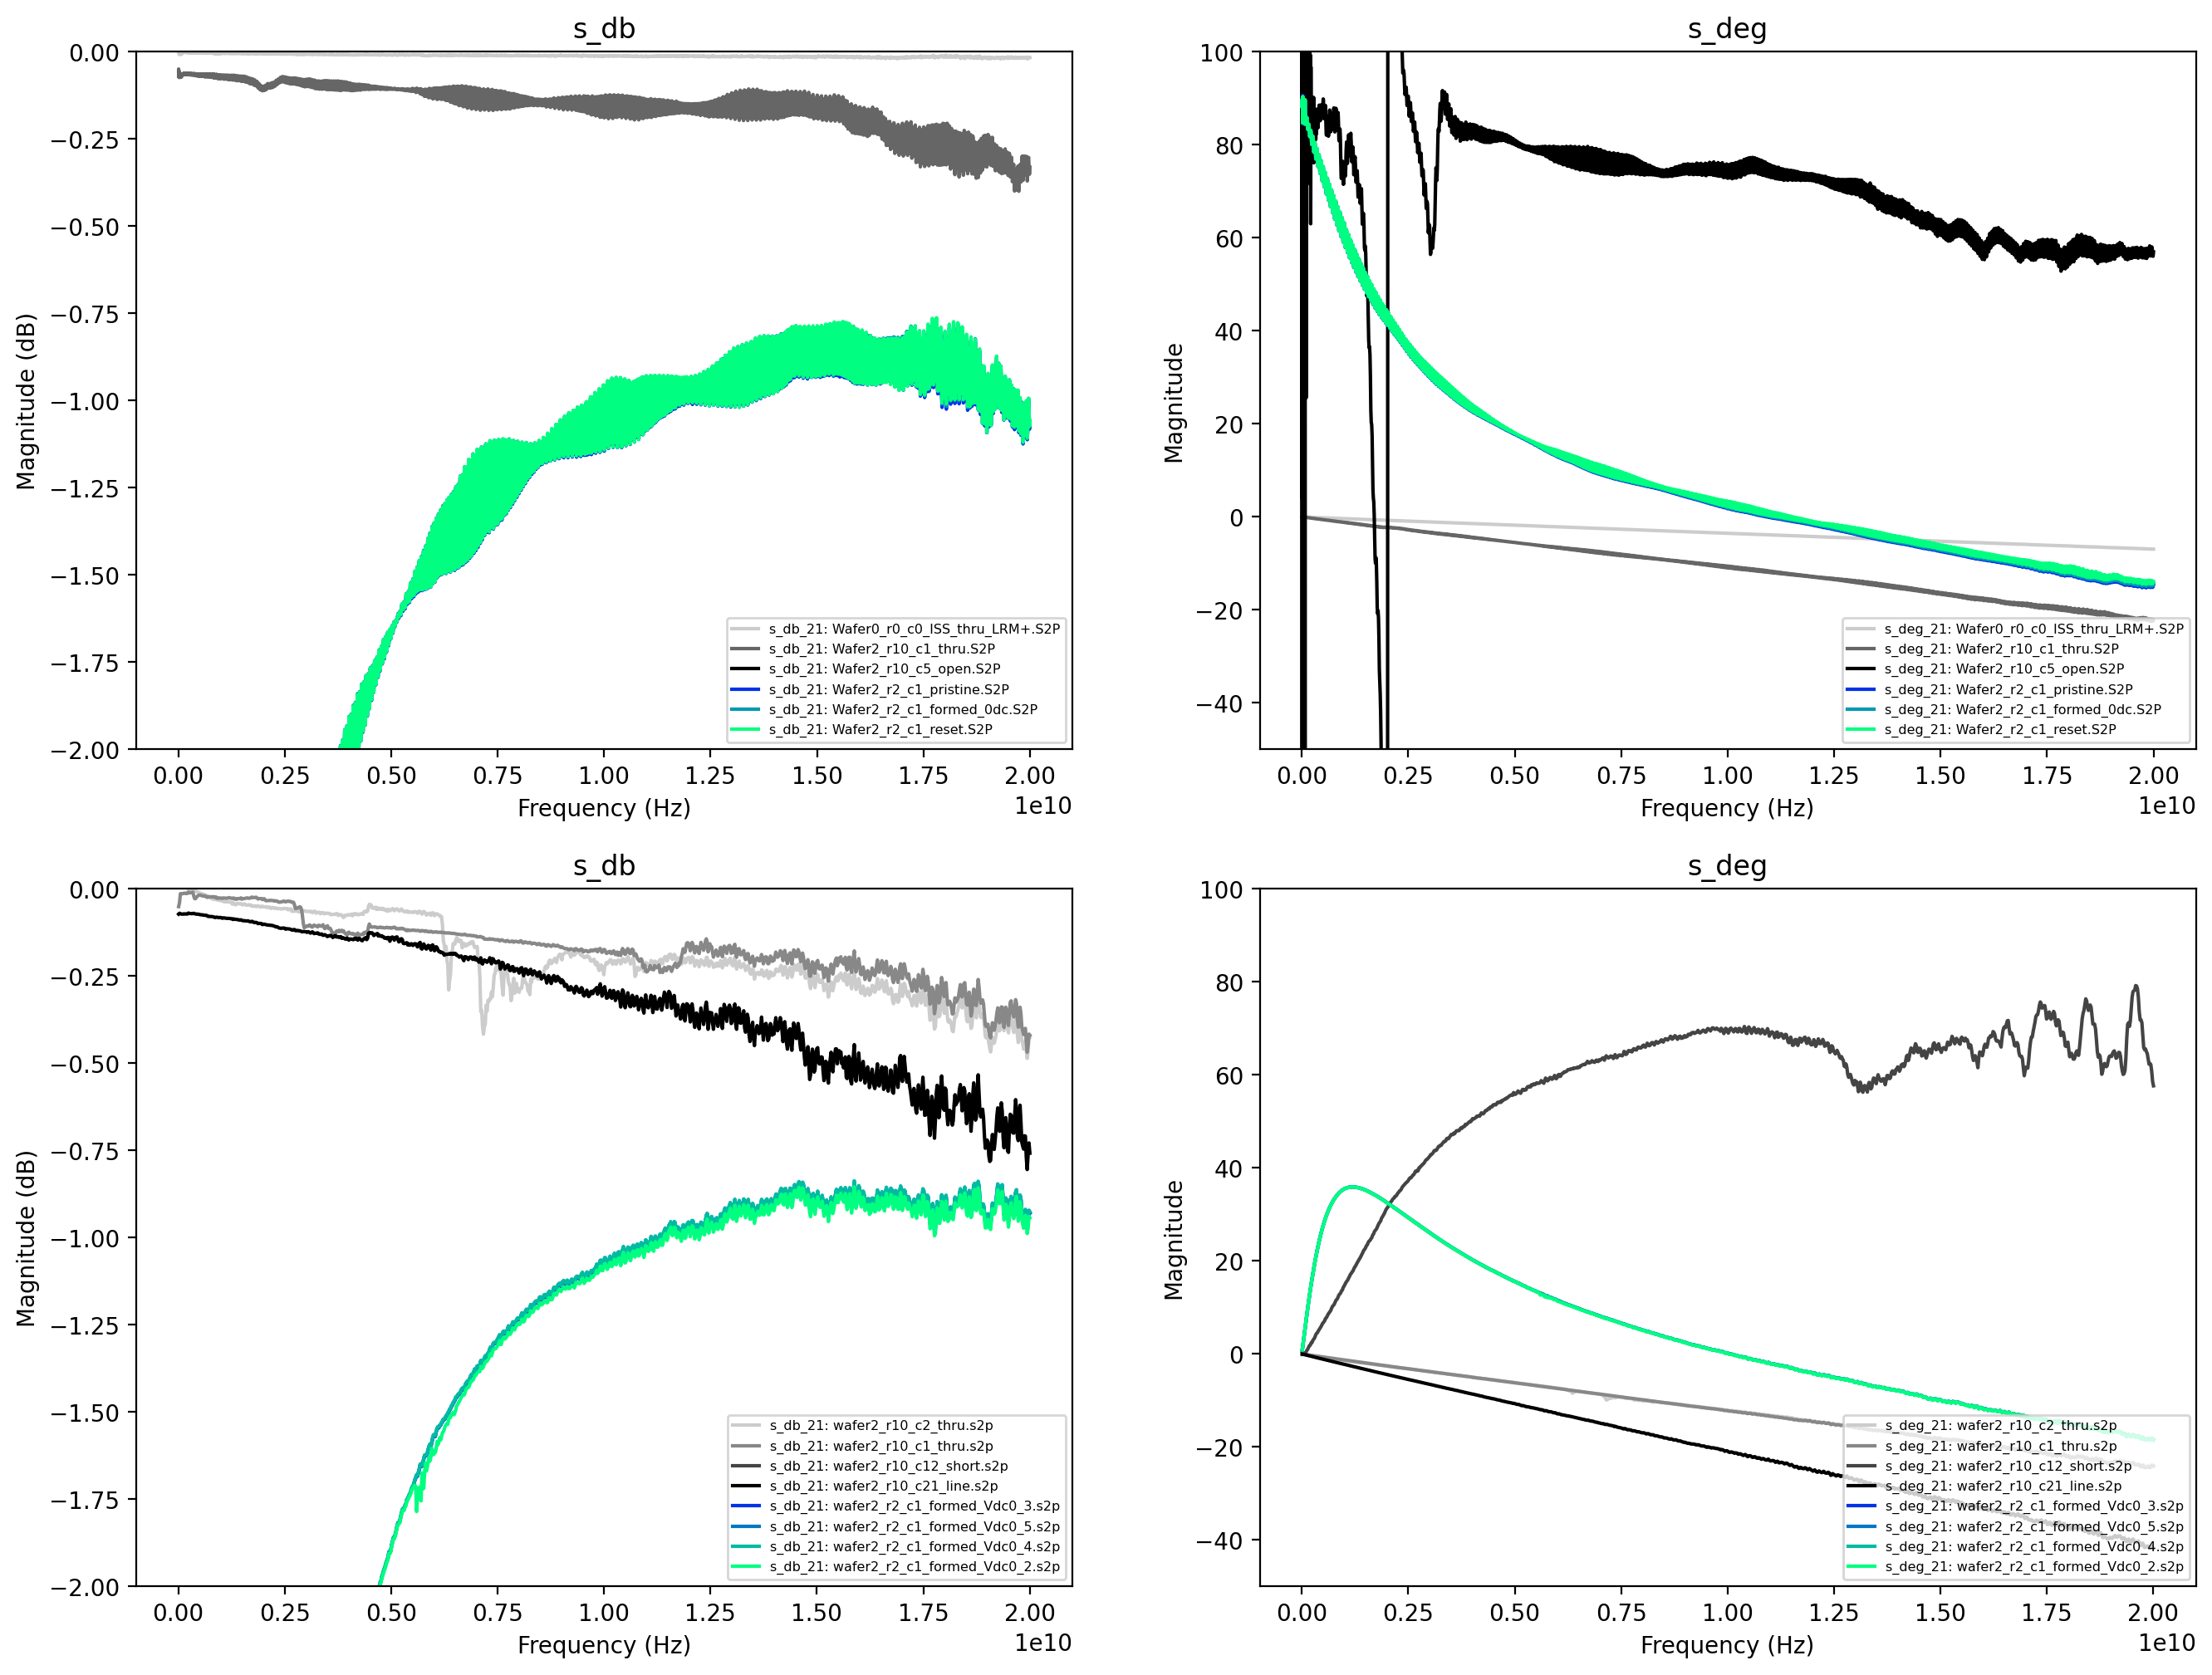

In [3]:
raw_data_LCN = subgen(s2p_files_1, run_nums =[[1,2,6,], [23,42,56] ] )
raw_data = subgen(s2p_files_2, run_nums =[[1,2,7,8], [10,11,12,13] ] )

f = plt.figure(figsize=(16,12),dpi=200)
gs = f.add_gridspec(2, 2)

ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

#LCN data
sub_plot(ax=ax, dev_subset=raw_data_LCN, plot_type=['s_db'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [-2,0],x_range='0.01-20ghz')
sub_plot(ax=ax1, dev_subset=raw_data_LCN, plot_type=['s_deg'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[-50,100], x_range='0.01-20ghz')

#EEE data
sub_plot(ax=ax2,dev_subset=raw_data, plot_type=['s_db'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [-2,0],x_range='0.01-20ghz')
sub_plot(ax=ax3, dev_subset=raw_data, plot_type=['s_deg'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[-50,100], x_range='0.01-20ghz')

plt.show()

### Initial Analysis
 - Ripples in the S21 are better for the EEE keysight compared to the LCN
    - This could be the lower resolution (as we measured up to 67ghz with 3200 points in EEE) and I had a similar number of points for 20Ghz at the LCN
    - This could be due to better probes/cables, which are rated up to 67 GHz and we also include an extra cal step for the cables in EEE

### De-embedding

In [4]:
#-------------------Grouping-------------------
# Select the On Wafer Calibration files to be used

###LCN data
ISS_thru_LCN = [s for s in s2p_files_1 if s.state == 'thru' and s.wafer_number == 0]
cal_thru_LCN = [s for s in s2p_files_1 if s.state == 'thru' and s.wafer_number != 0]
cal_open_LCN = [s for s in s2p_files_1 if s.state == 'open' or s.state == 'opensig']
cal_short_LCN = [s for s in s2p_files_1 if s.state == 'short']

### EEE data
ISS_thru_EEE = [s for s in s2p_files_2 if s.state == 'thru' and s.wafer_number == 0]
cal_thru_EEE = [s for s in s2p_files_2 if s.state == 'thru' and s.wafer_number != 0]
cal_open_EEE = [s for s in s2p_files_2 if s.state == 'open' or s.state == 'opensig']
cal_short_EEE = [s for s in s2p_files_2 if s.state == 'short']


#-------------------De-Embedding-------------------
print('open_short_thru_LCN=',len(cal_open_LCN),len(cal_short_LCN),len(cal_thru_LCN))
print('open_short_thru_EEE=',len(cal_open_EEE),len(cal_short_EEE),len(cal_thru_EEE))

### LCN de-embedding
OS_LCN = calibration_OS(cal_open_LCN, cal_short_LCN, cal_thru_LCN, plot_cal = False) #calibration object outputted from all the on wafer measurements
TX_LCN = calibration_2x(cal_thru_LCN, plot_cal = False) #calibration object outputted from all the on wafer measurements

### EEE de-embedding
OS_EEE = calibration_OS(cal_open_EEE, cal_short_EEE, cal_thru_EEE, plot_cal = False) #calibration object outputted from all the on wafer measurements
TX_EEE = calibration_2x(cal_thru_EEE, plot_cal = False) #calibration object outputted from all the on wafer measurements

open_short_thru_LCN= 4 2 4
open_short_thru_EEE= 2 2 3
[29493.25017913594, 29493.828865204905, 29493.097293820058, 29492.936062208333, 29489.754914854297, 29493.548249662417, 29489.8297148353, 29490.92647900279]
Best de-embedding protocol: dm[4] = 29489.754914854297, worst:dm[1] = 29493.828865204905


/Users/horatiocox/Desktop/VNA_Analysis/VNAenv/lib/python3.9/site-packages/skrf/calibration/deembedding.py:1069: RuntimeWarning: Non-uniform frequency vector detected. An interpolated S-parameter matrix will be created for
                   this calculation. The output results will be re-interpolated to the original vector.
  self.s_side1, self.s_side2 = self.split2xthru(self.s2xthru)


[22093.334805985014, 22166.101440143848, 22111.505466789735, 22149.911859675216]
Best de-embedding protocol: dm[0] = 22093.334805985014, worst:dm[1] = 22166.101440143848
[20157.99517674213, 20133.770454262056, 19908.53505893291, 19880.12059770654]
Best de-embedding protocol: dm[3] = 19880.12059770654, worst:dm[0] = 20157.99517674213
[12868.740555348324, 12827.859248257893, 12711.839407278296]
Best de-embedding protocol: dm[2] = 12711.839407278296, worst:dm[0] = 12868.740555348324


### Compare Raw to de-embedded data for both experiments

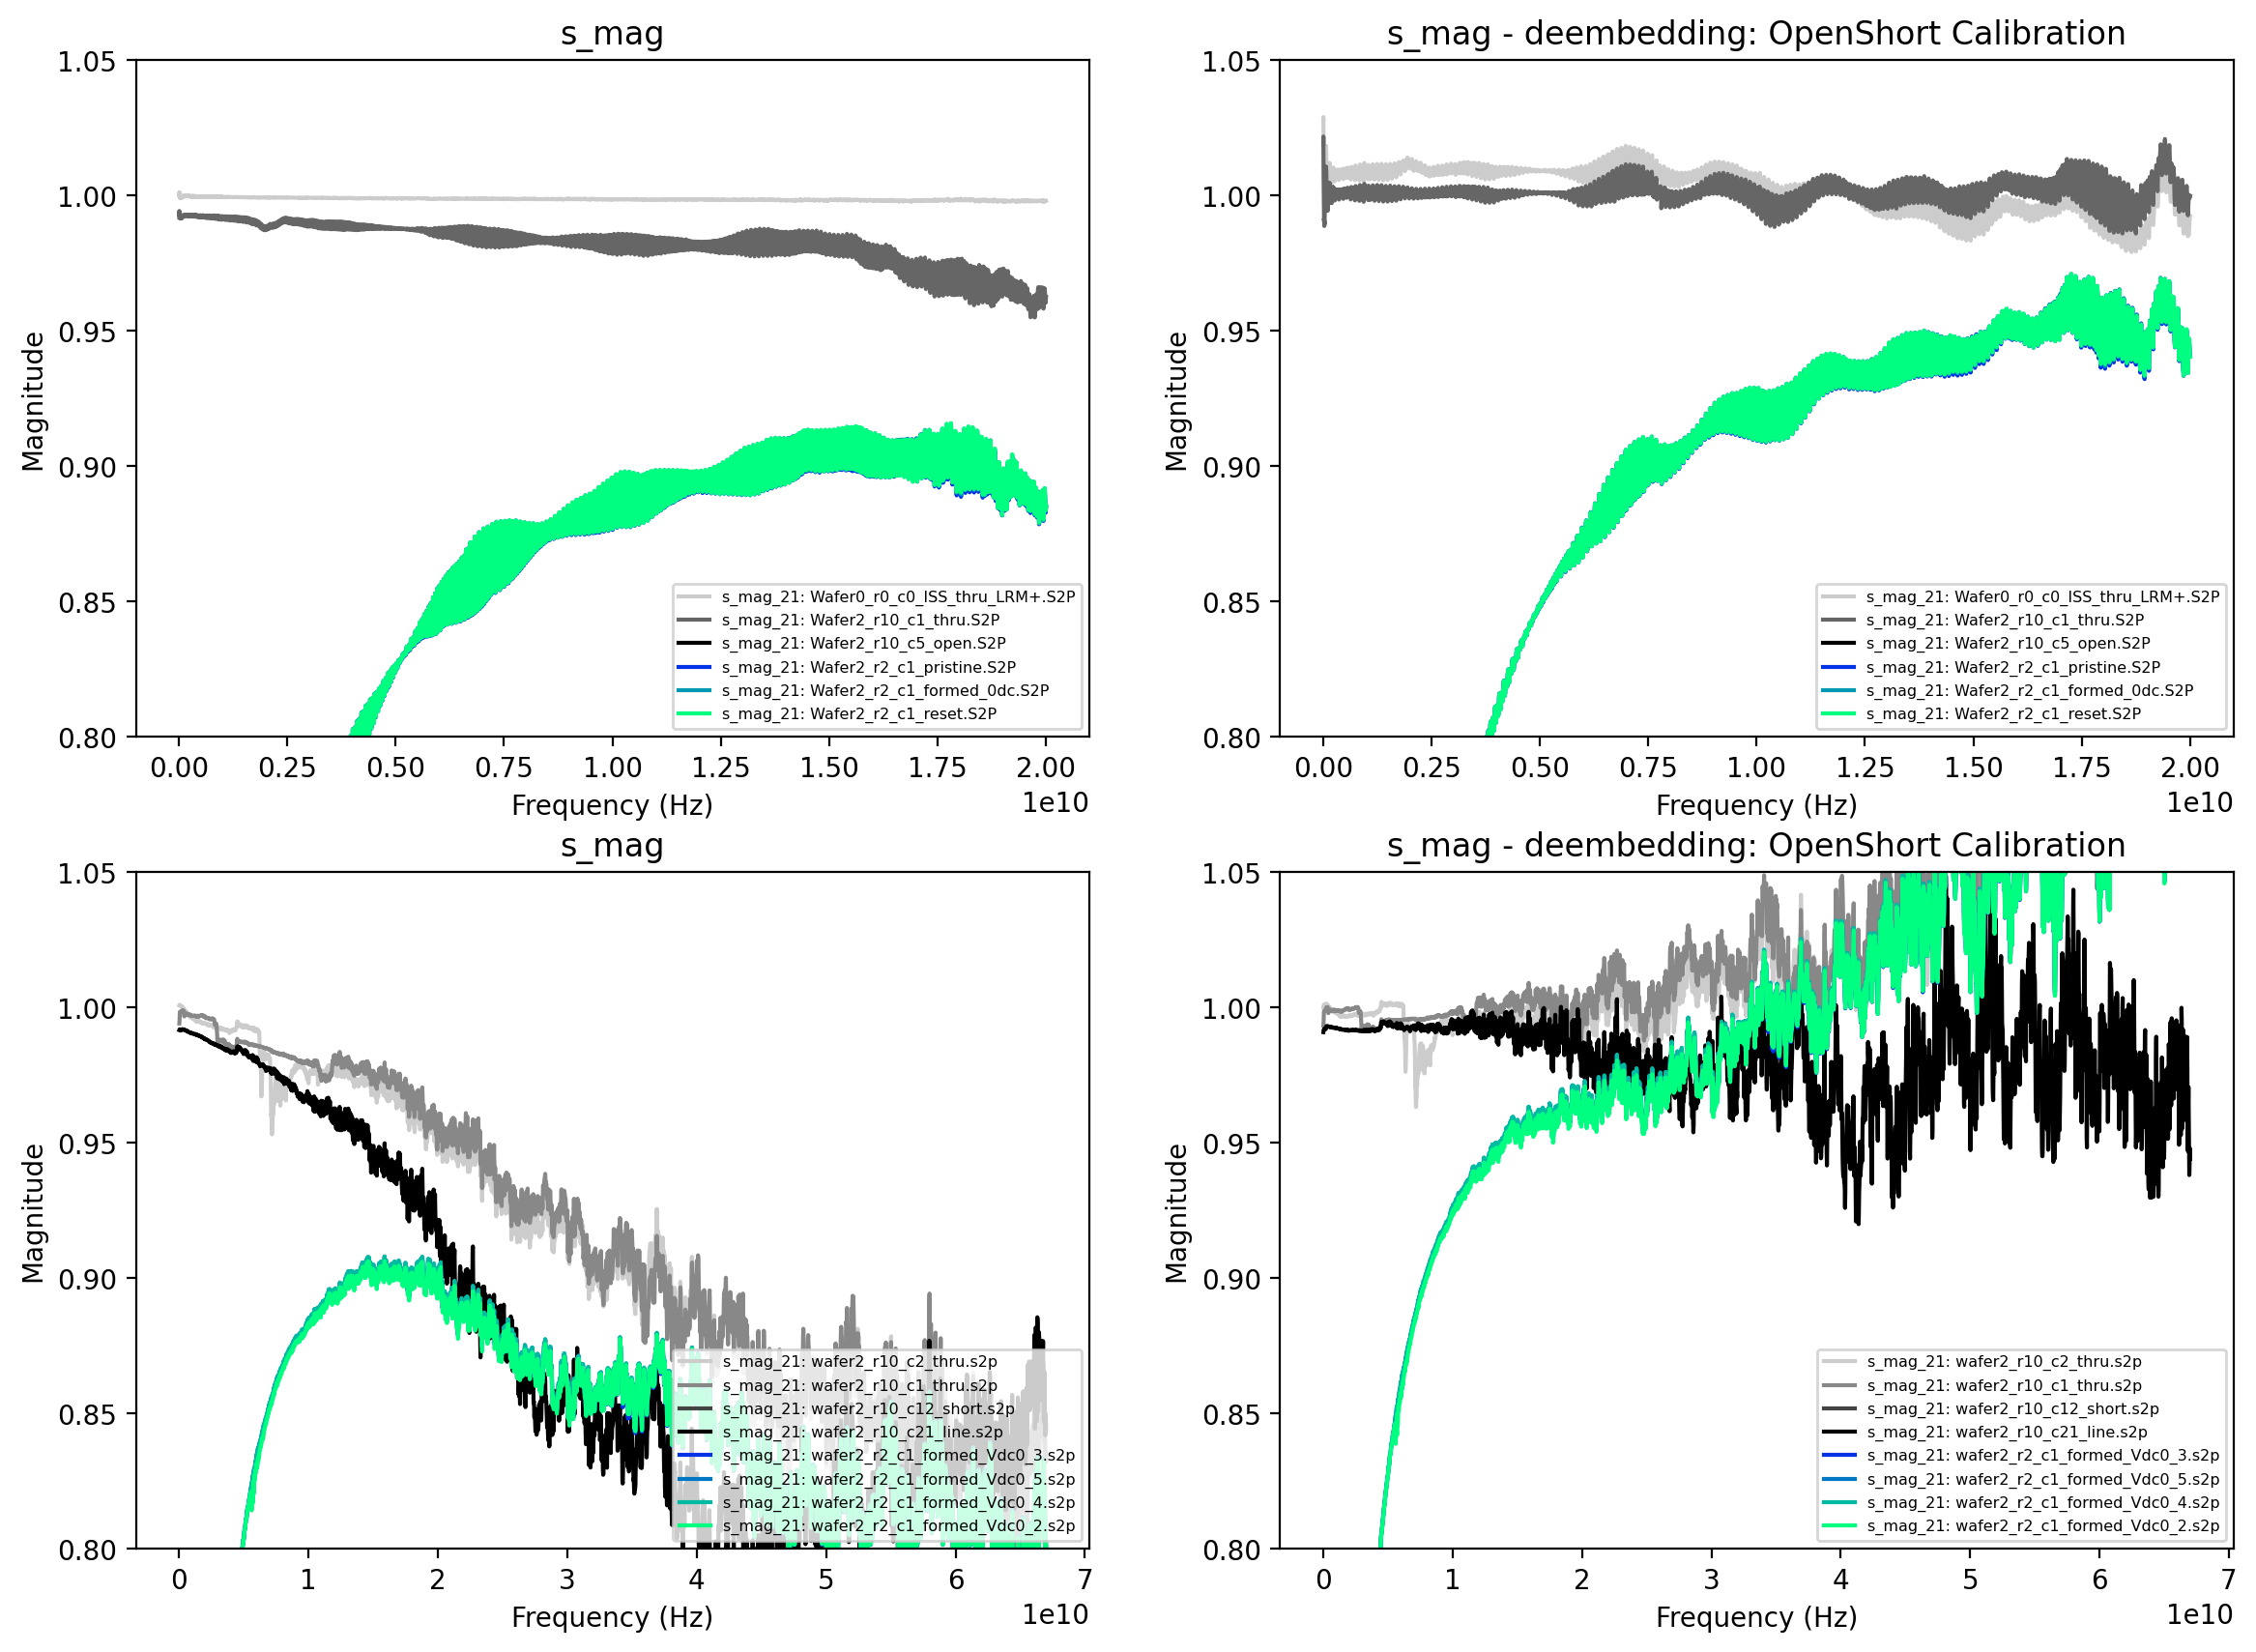

In [5]:
# Plot the data
f = plt.figure(figsize=(14,10),dpi=200)
gs = f.add_gridspec(2, 2)

ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

#LCN data
sub_plot(ax=ax, dev_subset=raw_data_LCN, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.8,1.05],x_range='0.01-20ghz')
sub_plot(ax=ax1, dev_subset=raw_data_LCN, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=True, 
         y_range=[0.8,1.05], x_range='0.01-20ghz',cal_in = OS_LCN)

#EEE data
sub_plot(ax=ax2,dev_subset=raw_data, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.8,1.05],x_range='0.01-67ghz')
sub_plot(ax=ax3, dev_subset=raw_data, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=True, 
         y_range=[0.8,1.05], x_range='0.01-67ghz',cal_in = OS_EEE)

plt.show()

### Notes
- Raw data on left - Open short type de-embedding is applied on the right
- The de-embedding improves the thru device measurably
- Definitely shifts the memristor so more signal going through for s21


### FFT filtering

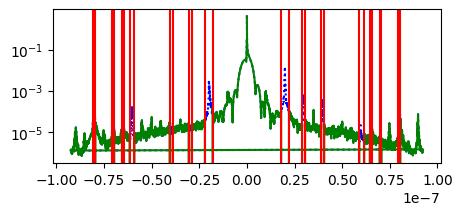

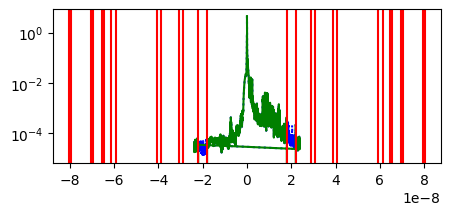

In [6]:
# Demo for the on-wafer thru device
thru_filt_test_LCN = [copy.deepcopy(cal_thru_LCN[0]),copy.deepcopy(cal_thru_LCN[1])]
thru_filt_test_EEE = [copy.deepcopy(cal_thru_EEE[0]),copy.deepcopy(cal_thru_EEE[1])]
# Select bandstop frequency components
threshold_values = [[1.8e-8,2.2e-8],[5.9e-8,6.15e-8],[3.9e-8,4.05e-8],[2.9e-8,3.05e-8],[7.95e-8,8.05e-8],[6.45e-8,6.55e-8],[6.96e-8,7.06e-8]]
# Apply the FFT, filter out components then IFFT
s2p_test_filt_LCN = fourier_filter(thru_filt_test_LCN, threshold = threshold_values,t_window = 0.02)
s2p_test_filt_EEE = fourier_filter(thru_filt_test_EEE, threshold = threshold_values,t_window = 0.02)

### Notes
- t_window applies a tukey window to the data before applying the FFT - this prevents spectral leakage
- This sacrifices some of the higher and  lower frequencies but massively improves the quality of the filtered data
- a higher t_window value applies a sharper window - so I have kept it as small as possible

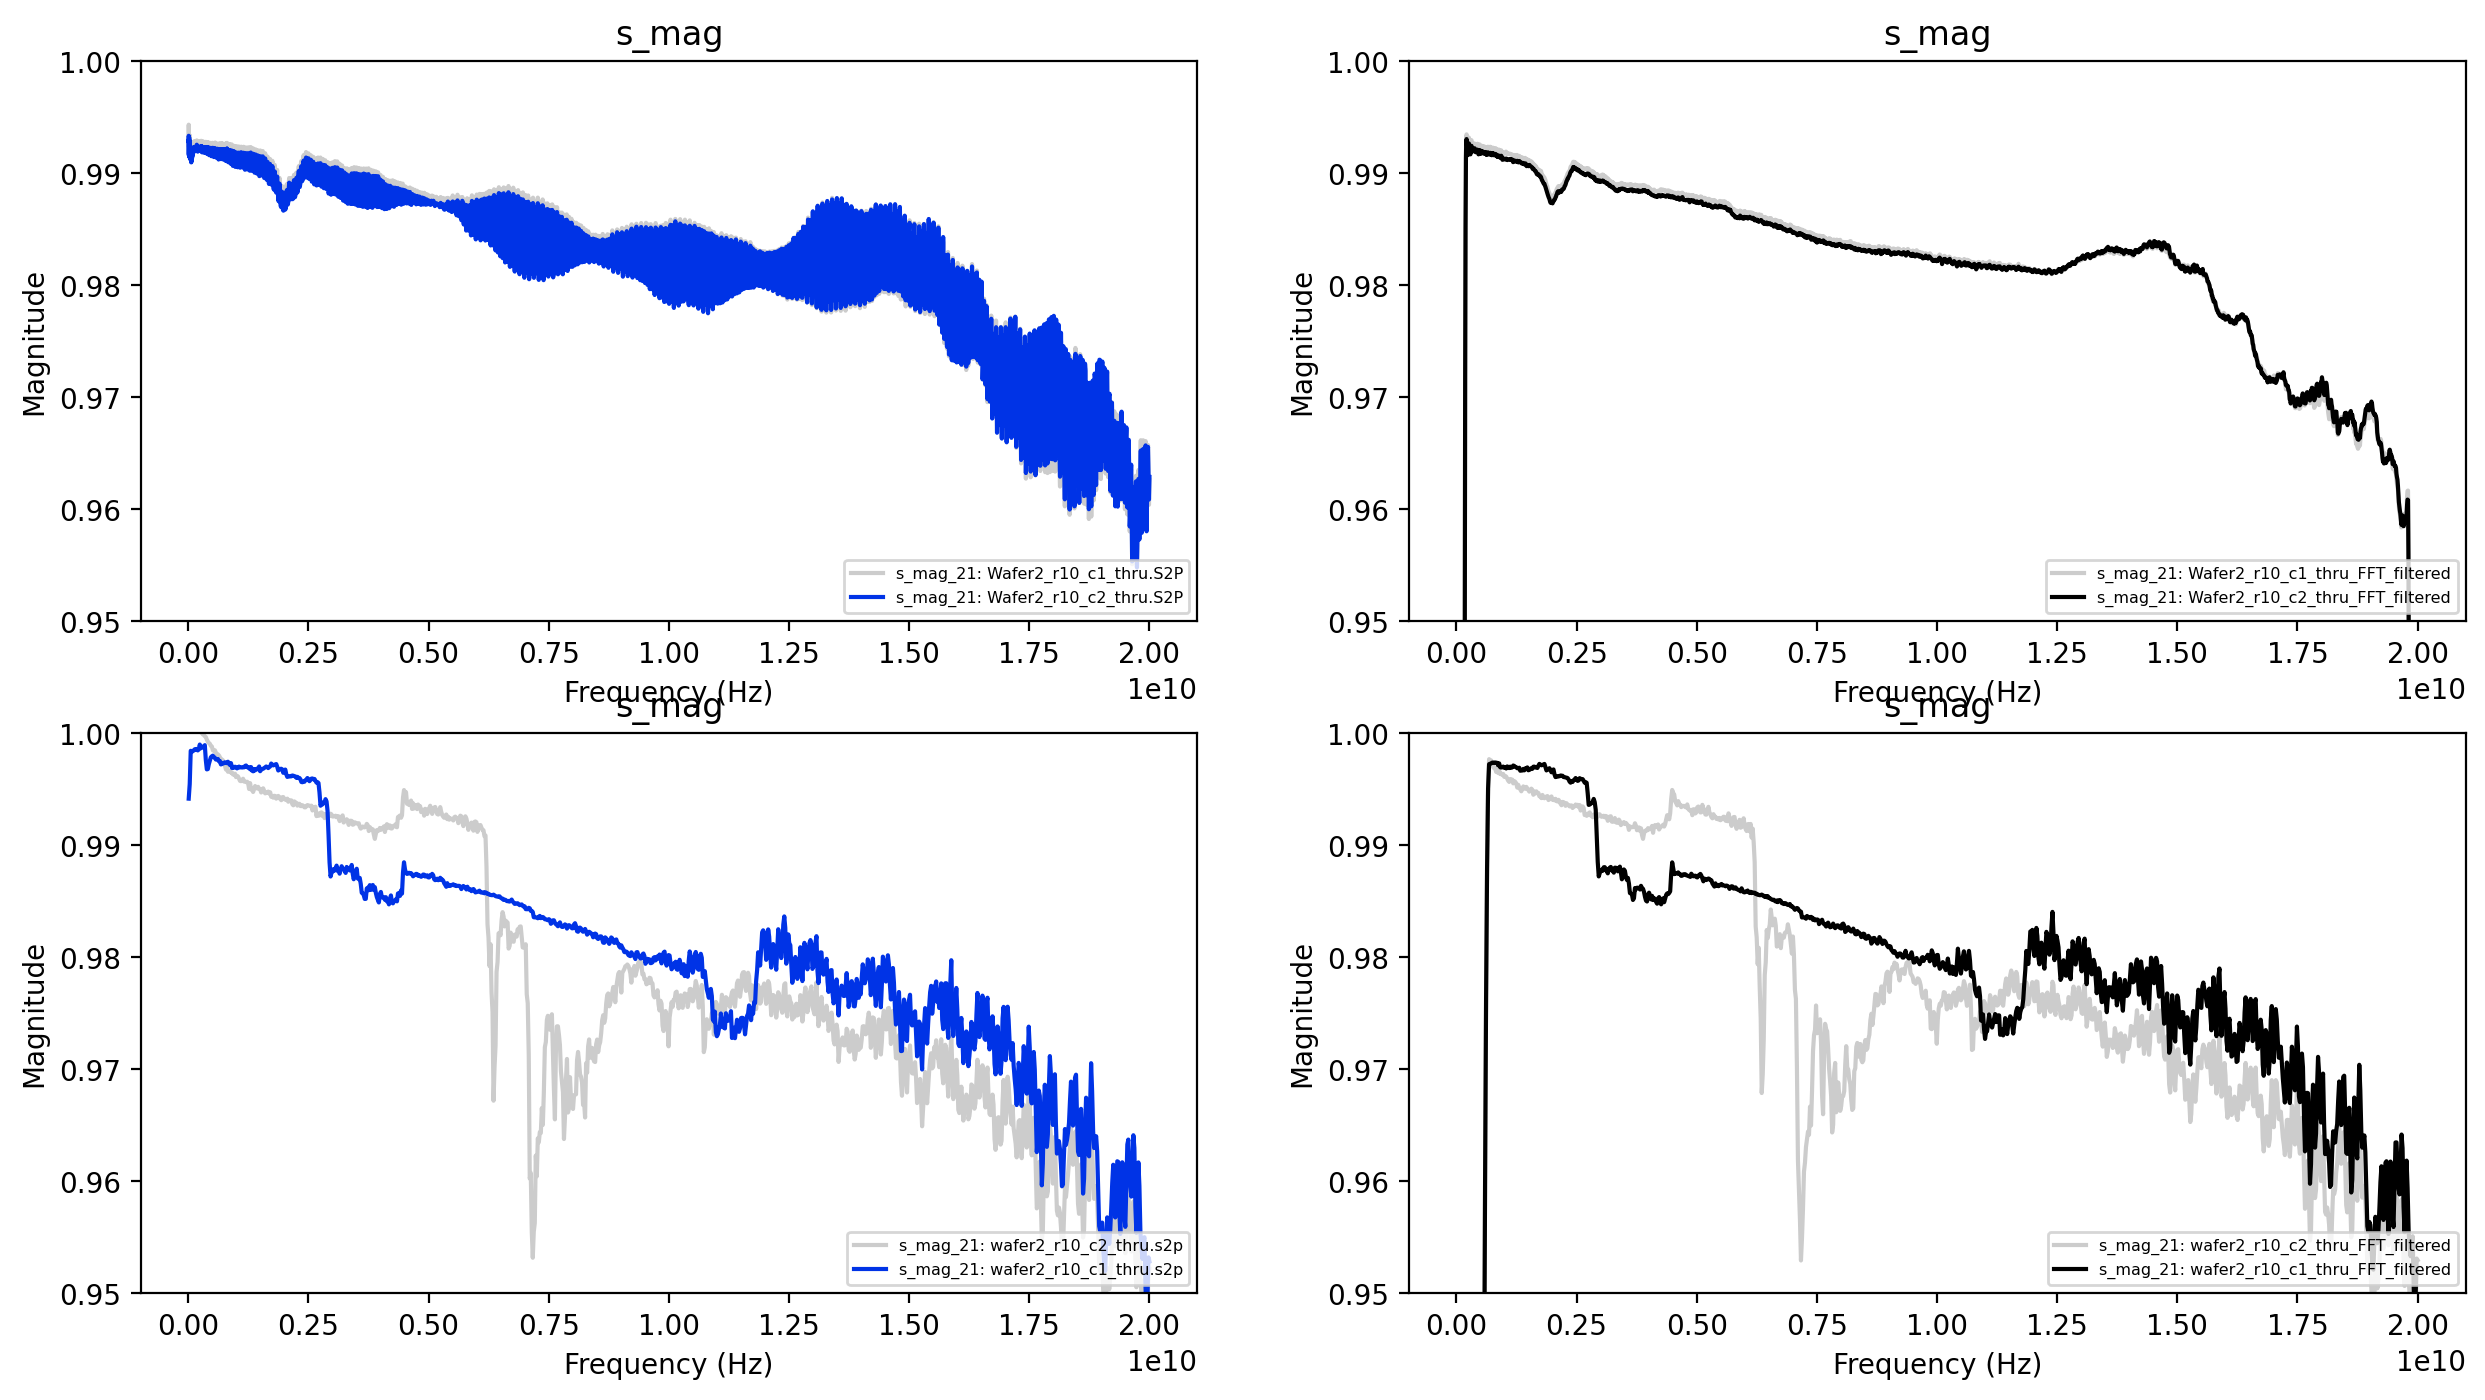

In [7]:
# Plot the data with and without FFT filtering
f = plt.figure(figsize=(15,8),dpi=200)
gs = f.add_gridspec(2, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

# LCN data
sub_plot(ax=ax, dev_subset=[[cal_thru_LCN[0]],[cal_thru_LCN[1]]], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.95,1.0],x_range='0.01-20ghz')
sub_plot(ax=ax1, dev_subset= [s2p_test_filt_LCN], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[0.95,1.0], x_range='0.01-20ghz')

# EEE data
sub_plot(ax=ax2, dev_subset=[[cal_thru_EEE[0]],[cal_thru_EEE[1]]], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.95,1.0],x_range='0.01-20ghz')
sub_plot(ax=ax3, dev_subset= [s2p_test_filt_EEE], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[0.95,1.0], x_range='0.01-20ghz')

plt.show()

### Notes
- EEE devices don't have same periodic noise and therefore FFT isn't doing much 
- Also the EEE devices have a smaller range and need different bandstops applying

### Re do calibration on LCN FFT filtered data for plotting

[28353.392561250494, 28370.406436998805, 28354.071596680602, 28371.07807926913, 28353.673722217638, 28370.669529166313, 28354.12137072636, 28371.112750655735]
Best de-embedding protocol: dm[0] = 28353.392561250494, worst:dm[7] = 28371.112750655735
[21952.43768002349, 21978.870347280088, 21979.473121506657, 21990.126025888083]
Best de-embedding protocol: dm[0] = 21952.43768002349, worst:dm[3] = 21990.126025888083


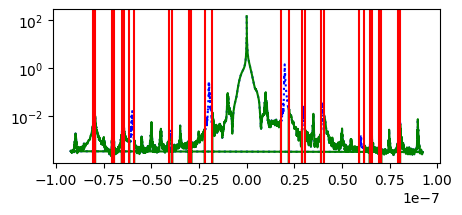

In [8]:
#### Need to re-do the calibration on fully FFT filtered LCN

s2p_files_1_filt = copy.deepcopy(s2p_files_1)
# Select bandstop frequency components
threshold_values = [[1.8e-8,2.2e-8],[5.9e-8,6.15e-8],[3.9e-8,4.05e-8],[2.9e-8,3.05e-8],[7.95e-8,8.05e-8],[6.45e-8,6.55e-8],[6.96e-8,7.06e-8]]
# Apply the FFT, filter out components then IFFT
s2p_files_1_filt = fourier_filter(s2p_files_1_filt, threshold = threshold_values,t_window = 0.02) #apply to deepcopy to avoid modifying the original data

#-------------------Grouping-------------------
# Select the On Wafer Calibration files to be used
ISS_thru_LCN_filt = [s for s in s2p_files_1_filt if s.state == 'thru' and s.wafer_number == 0]
cal_thru_LCN_filt = [s for s in s2p_files_1_filt if s.state == 'thru' and s.wafer_number != 0]
cal_open_LCN_filt = [s for s in s2p_files_1_filt if s.state == 'open' or s.state == 'opensig']
cal_short_LCN_filt = [s for s in s2p_files_1_filt if s.state == 'short']

#-------------------De-Embedding-------------------
OS_LCN_filt = calibration_OS(cal_open_LCN_filt, cal_short_LCN_filt, cal_thru_LCN_filt, plot_cal = False) #calibration object outputted from all the on wafer measurements
TX_LCN_filt = calibration_2x(cal_thru_LCN_filt, plot_cal = False) #calibration object outputted from all the on wafer measurements


### Memristor comparison
- Using de-embedded but not FFT filtered data for EEE experiments

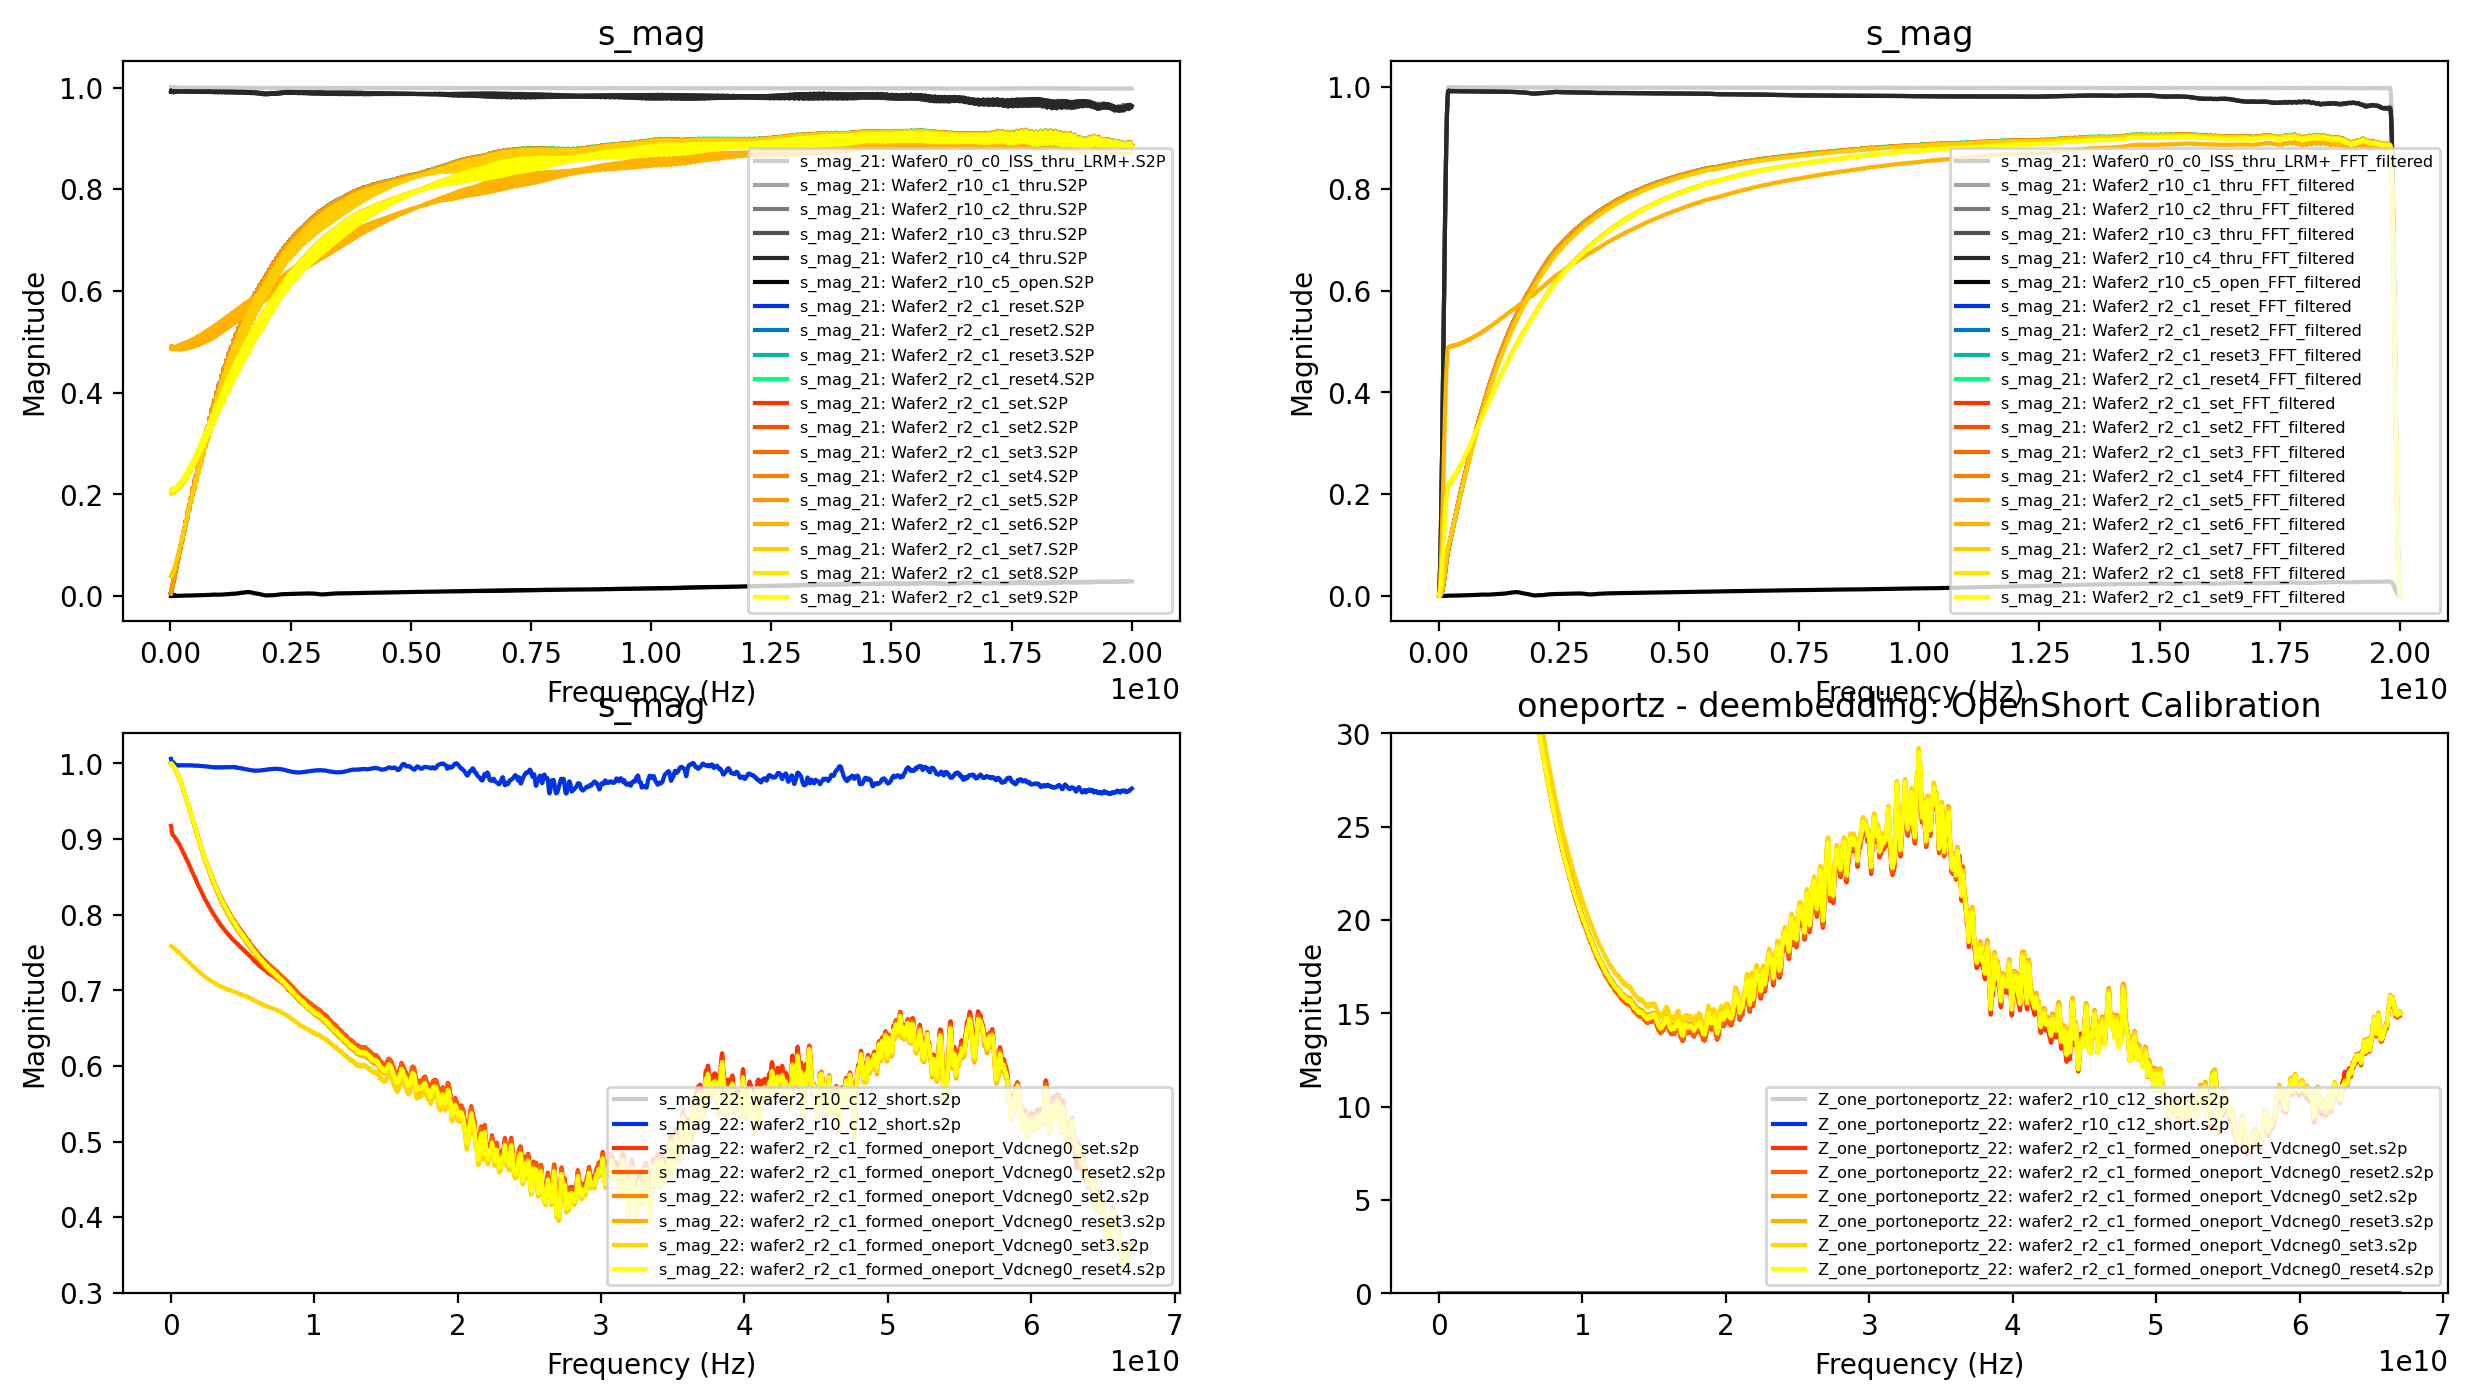

In [13]:

# LCN data select
filtered_memristor_LCN = subgen(s2p_files_1_filt, run_nums =[[1,2,3,4,5,6], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ] )
raw_data_mem_LCN = subgen(s2p_files_1, run_nums =[[1,2,3,4,5,6], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ] )

# LCN data select
raw_data_mem_EEE_2 = subgen(s2p_files_2, run_nums =[[7], [7], [39,40,41,42,43,44] ] )

f = plt.figure(figsize=(15,8),dpi=200)
gs = f.add_gridspec(2, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

# LCN data
sub_plot(ax=ax, dev_subset=raw_data_mem_LCN, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = None,x_range='0.01-20ghz')
sub_plot(ax=ax1, dev_subset= filtered_memristor_LCN, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=None, x_range='0.01-20ghz')

# EEE data
sub_plot(ax=ax2, dev_subset=raw_data_mem_EEE_2, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[2], deembed_data=False, 
         y_range = None,x_range='0.01-67ghz')
sub_plot(ax=ax3, dev_subset= raw_data_mem_EEE_2, plot_type=['oneportz'], log_x=False, m_port=[2], n_port=[2], deembed_data=True, 
         y_range=[0,30], x_range='0.01-67ghz',cal_in = OS_EEE)

plt.show()

### Notes
- Overall a large improvement in both reducing the noise and increasing the S21 transmission
- Now we can compare memristor states


# Memristor state comparison
- Plotting a comparison of the memristor data before(left) and after (right) the FFT/De-embedding
- Comparing SET/RESET states

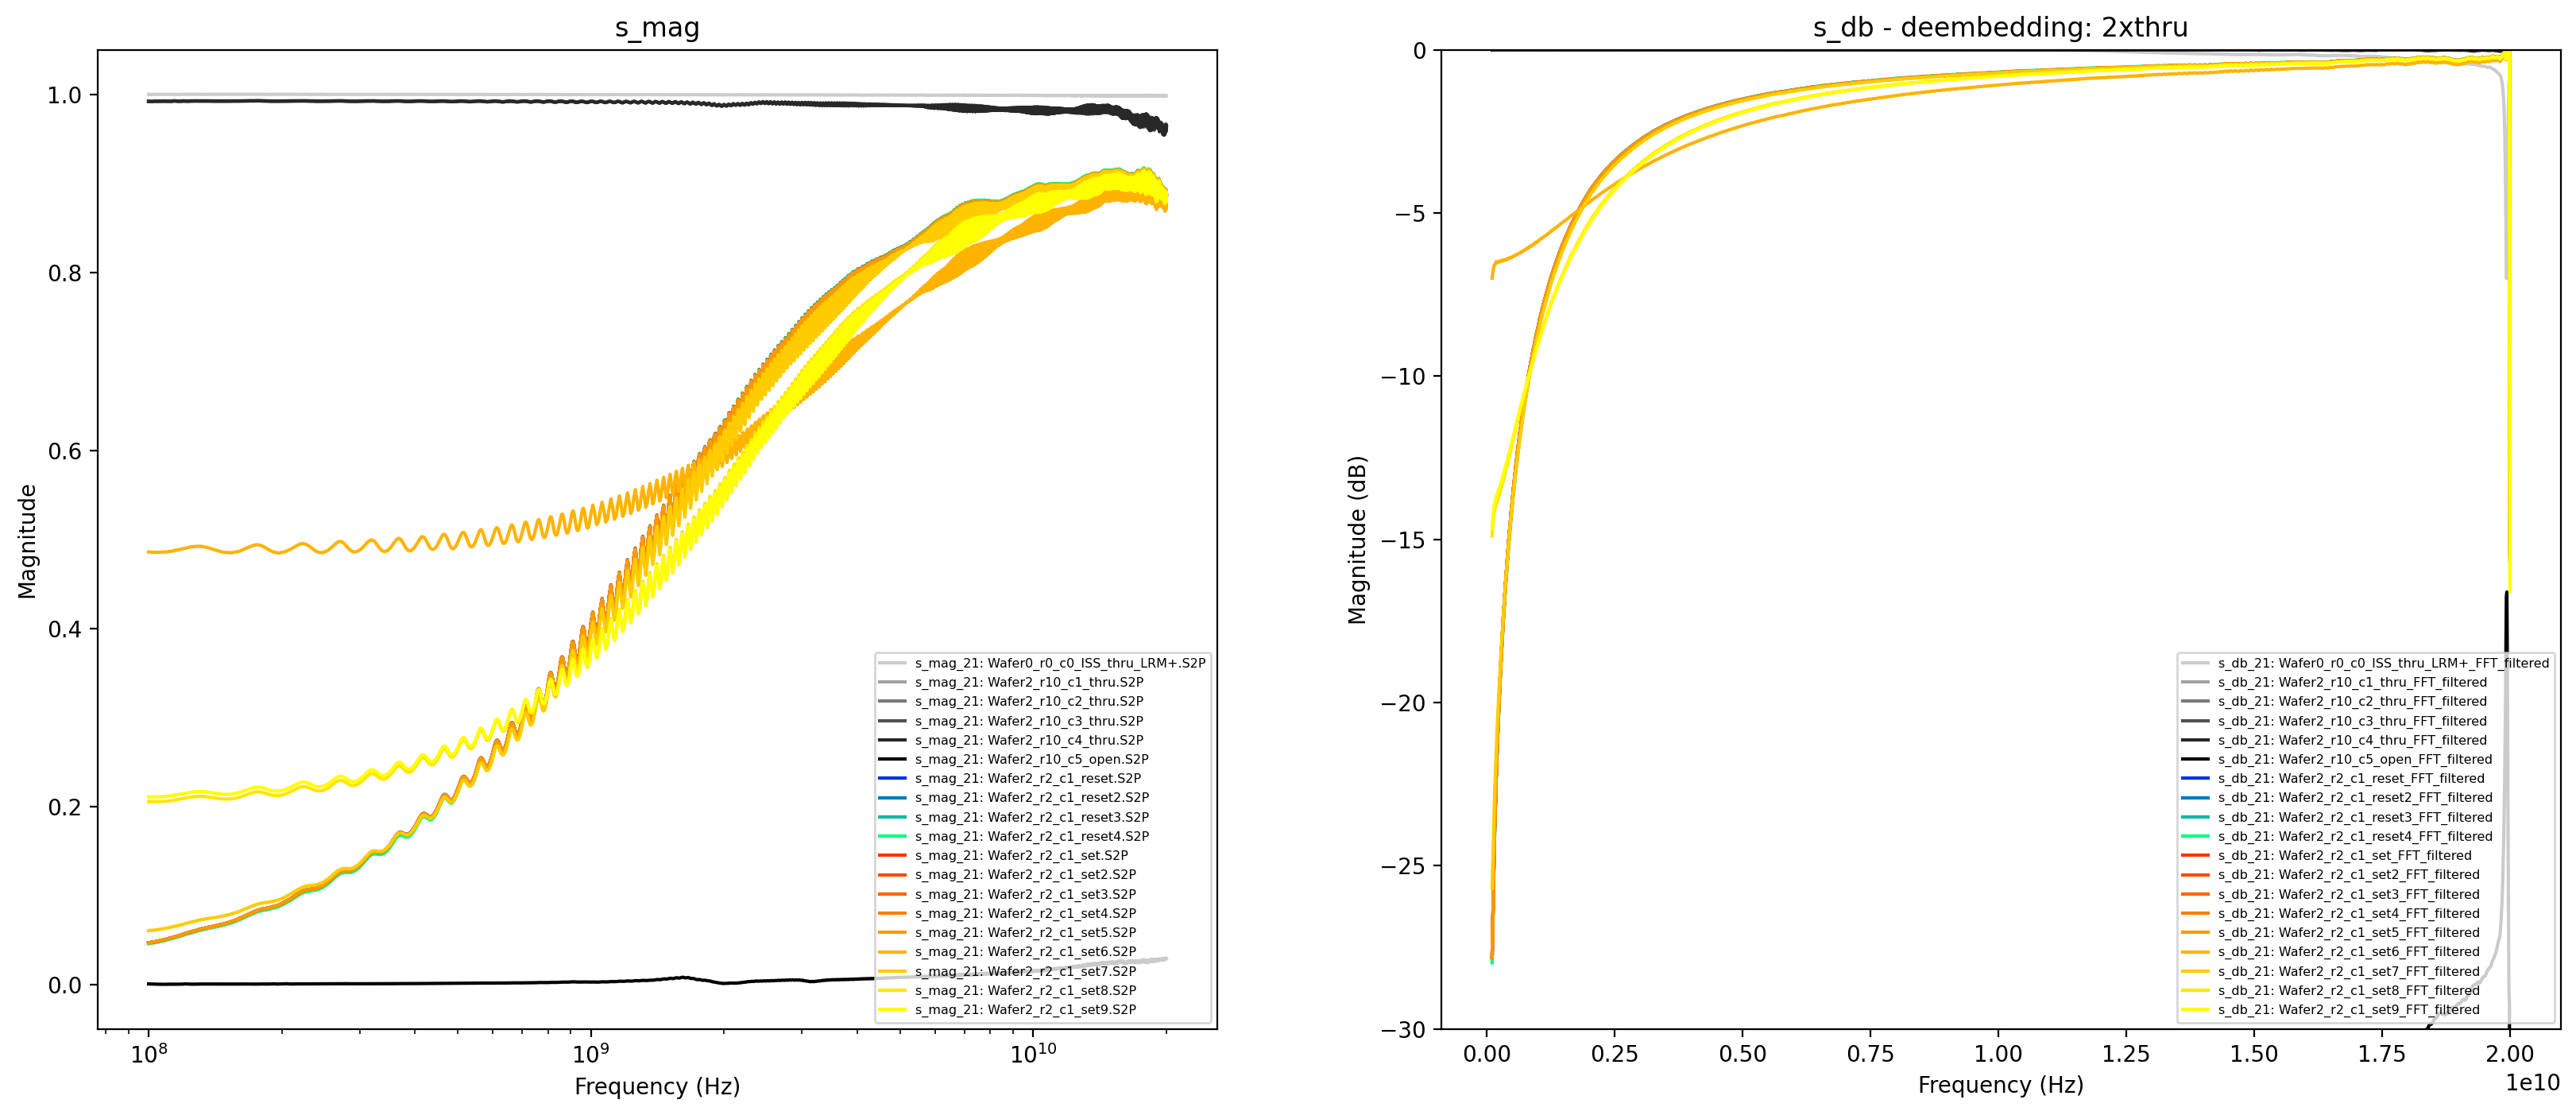

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[[1,2,3,4,5,6], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )
raw_data_mem2 = subgen(s2p_files_2, run_nums = run_n )

# Plot the memristor before and after data processing
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

# raw memristor data
sub_plot(ax=ax, dev_subset = raw_data_mem2, plot_type=['s_mag'], log_x=True, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = None,x_range='0.1-20ghz')

# Apply the filtered TX deembeding to the filtered data
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['s_db'], log_x=False, m_port=[2], n_port=[1], deembed_data=True, 
         y_range=[-30,0], x_range='0.1-20ghz',cal_in = TX_filt)

plt.show()

### Notes
- Set is where we see the largest variation due to big differences in the resistance of the LRS
    - potentially filamental vs interface based switching
- RESET into the HRS yields a much tighter range of values
    - Is still a clear variation in the HRS 
- A significant finding here is not only that the resistance switching is visible at the lower frequencies but that at higher frequencies there are clear differences in the S-params which I believe indicates differences in the permittivity/capacitance of devices
- Clearly these devices can be used to modulate microwave signals across a broad range of frequencies which is a good start


### Look At Power inputz and other params
- Inputz is the input impedance which if the memristor were not there would be 50 ohms
    - the memristor adds to the input impedance
- Power shows the power conservation
    - A value of less than one indicates power absorbed into memristor
    - potentially very useful to see which frequencies the memristor will absorb maximal power - therefore potentially change state

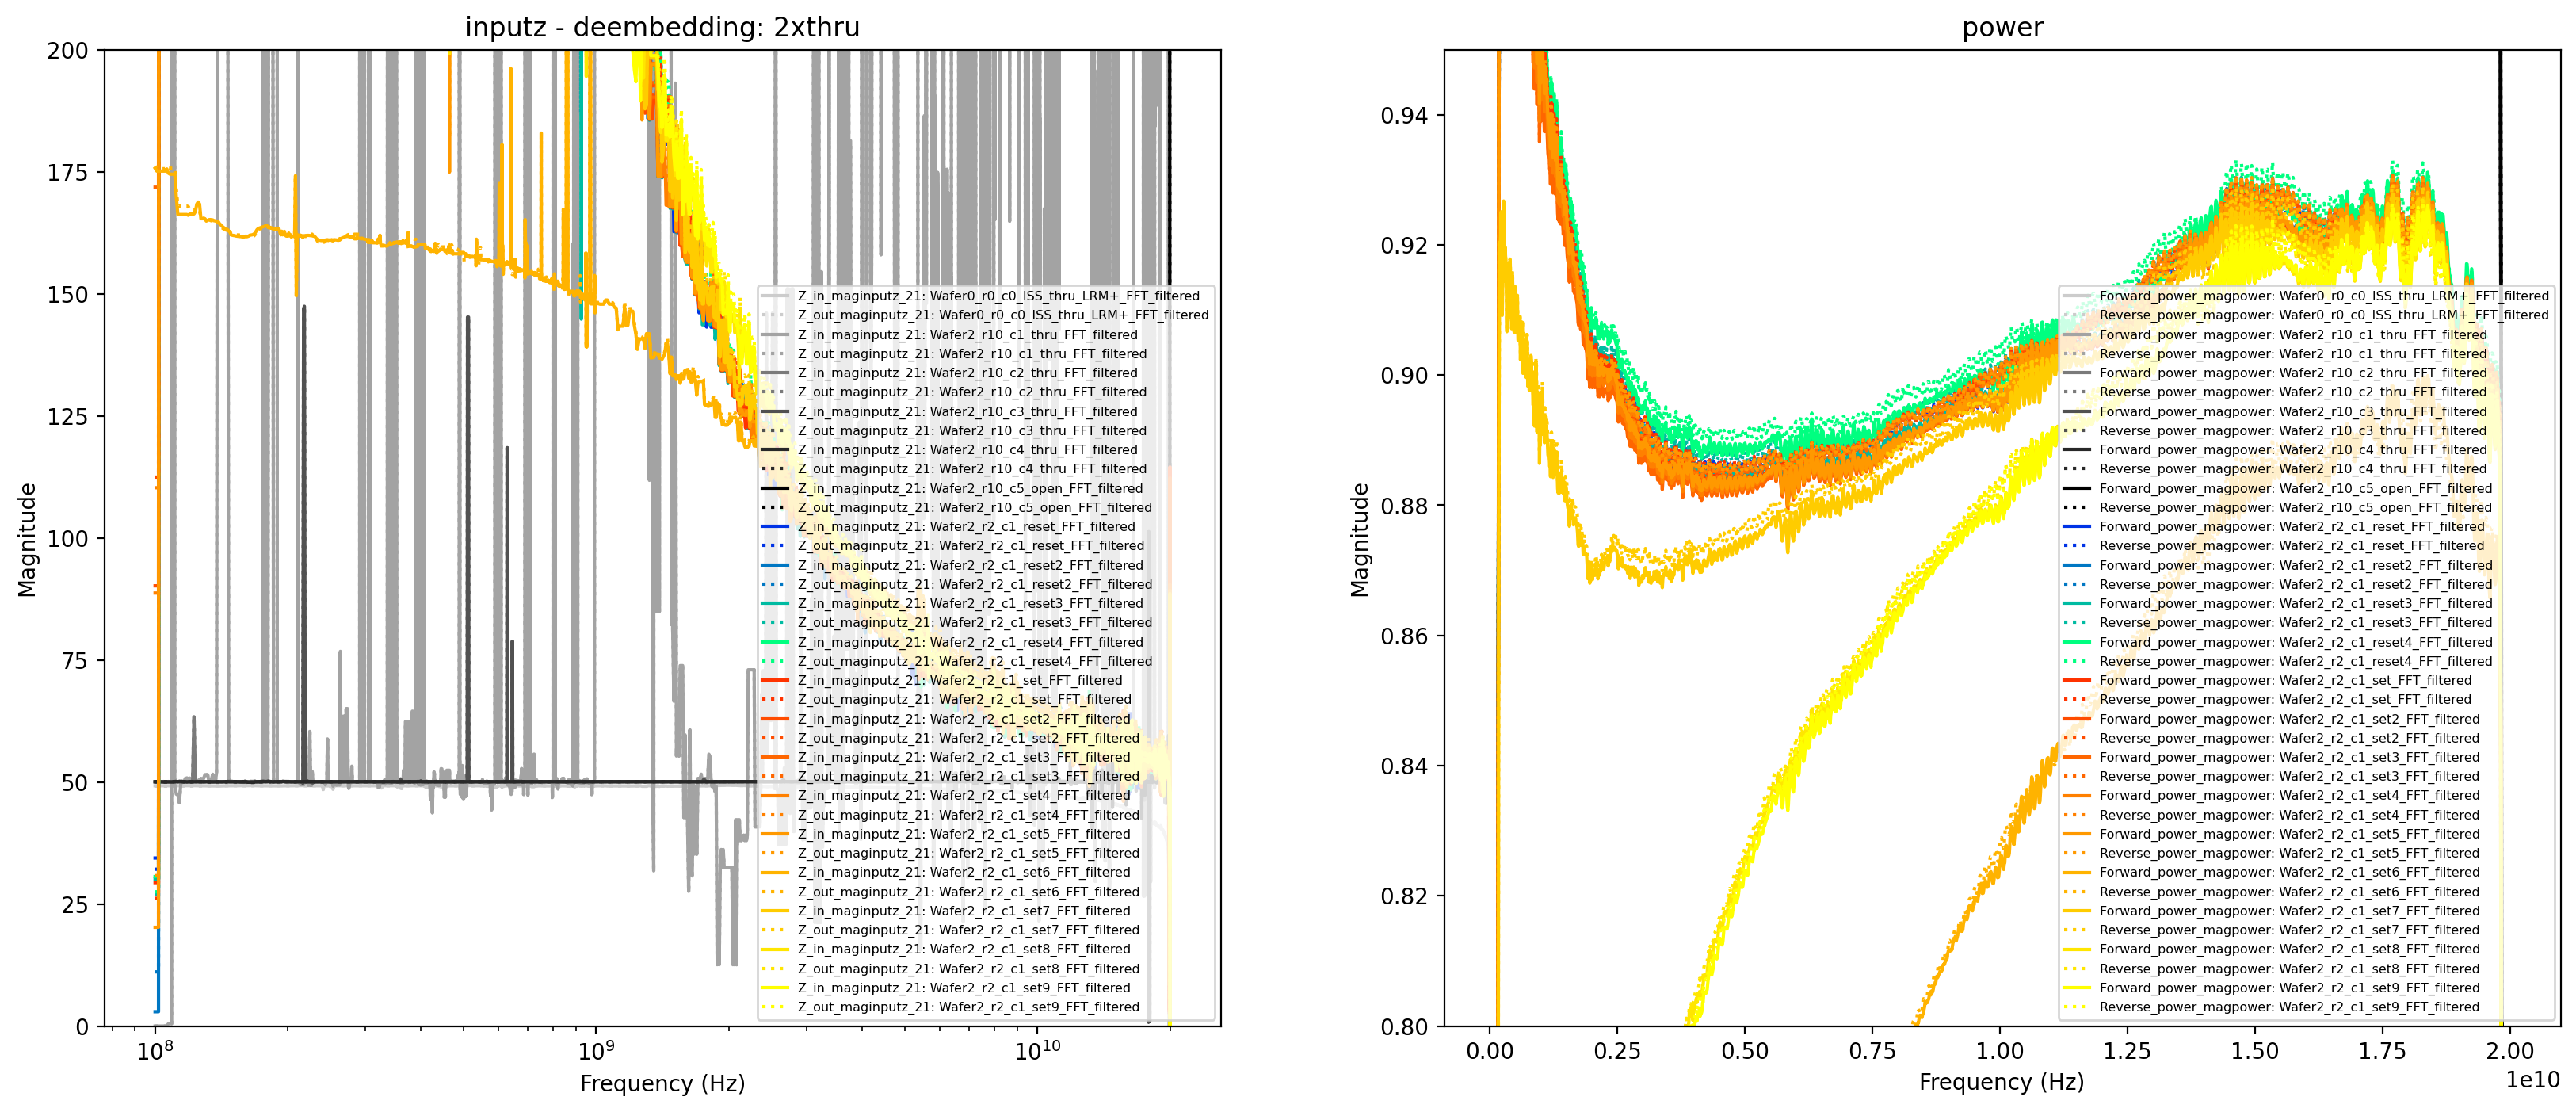

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[[1,2,3,4,5,6], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )

# Plot the FFT data with and without de embedding
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

#Plotting and comparing only the filtered data now
sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['inputz'], log_x=True, m_port=[2], n_port=[1], deembed_data=True, 
         y_range = [0,200],x_range='0.1-20ghz',cal_in = TX_filt)
# Apply the filtered TX deembeding to the filtered data
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['power'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[0.8,0.95], x_range='0.1-20ghz',cal_in = OS_filt)

plt.show()

### Normalization
- normalising the input impedance and s parameters to a pristine reference measurement
- This shows any difference in Z_in/S_param induced through the switching or DC biasing

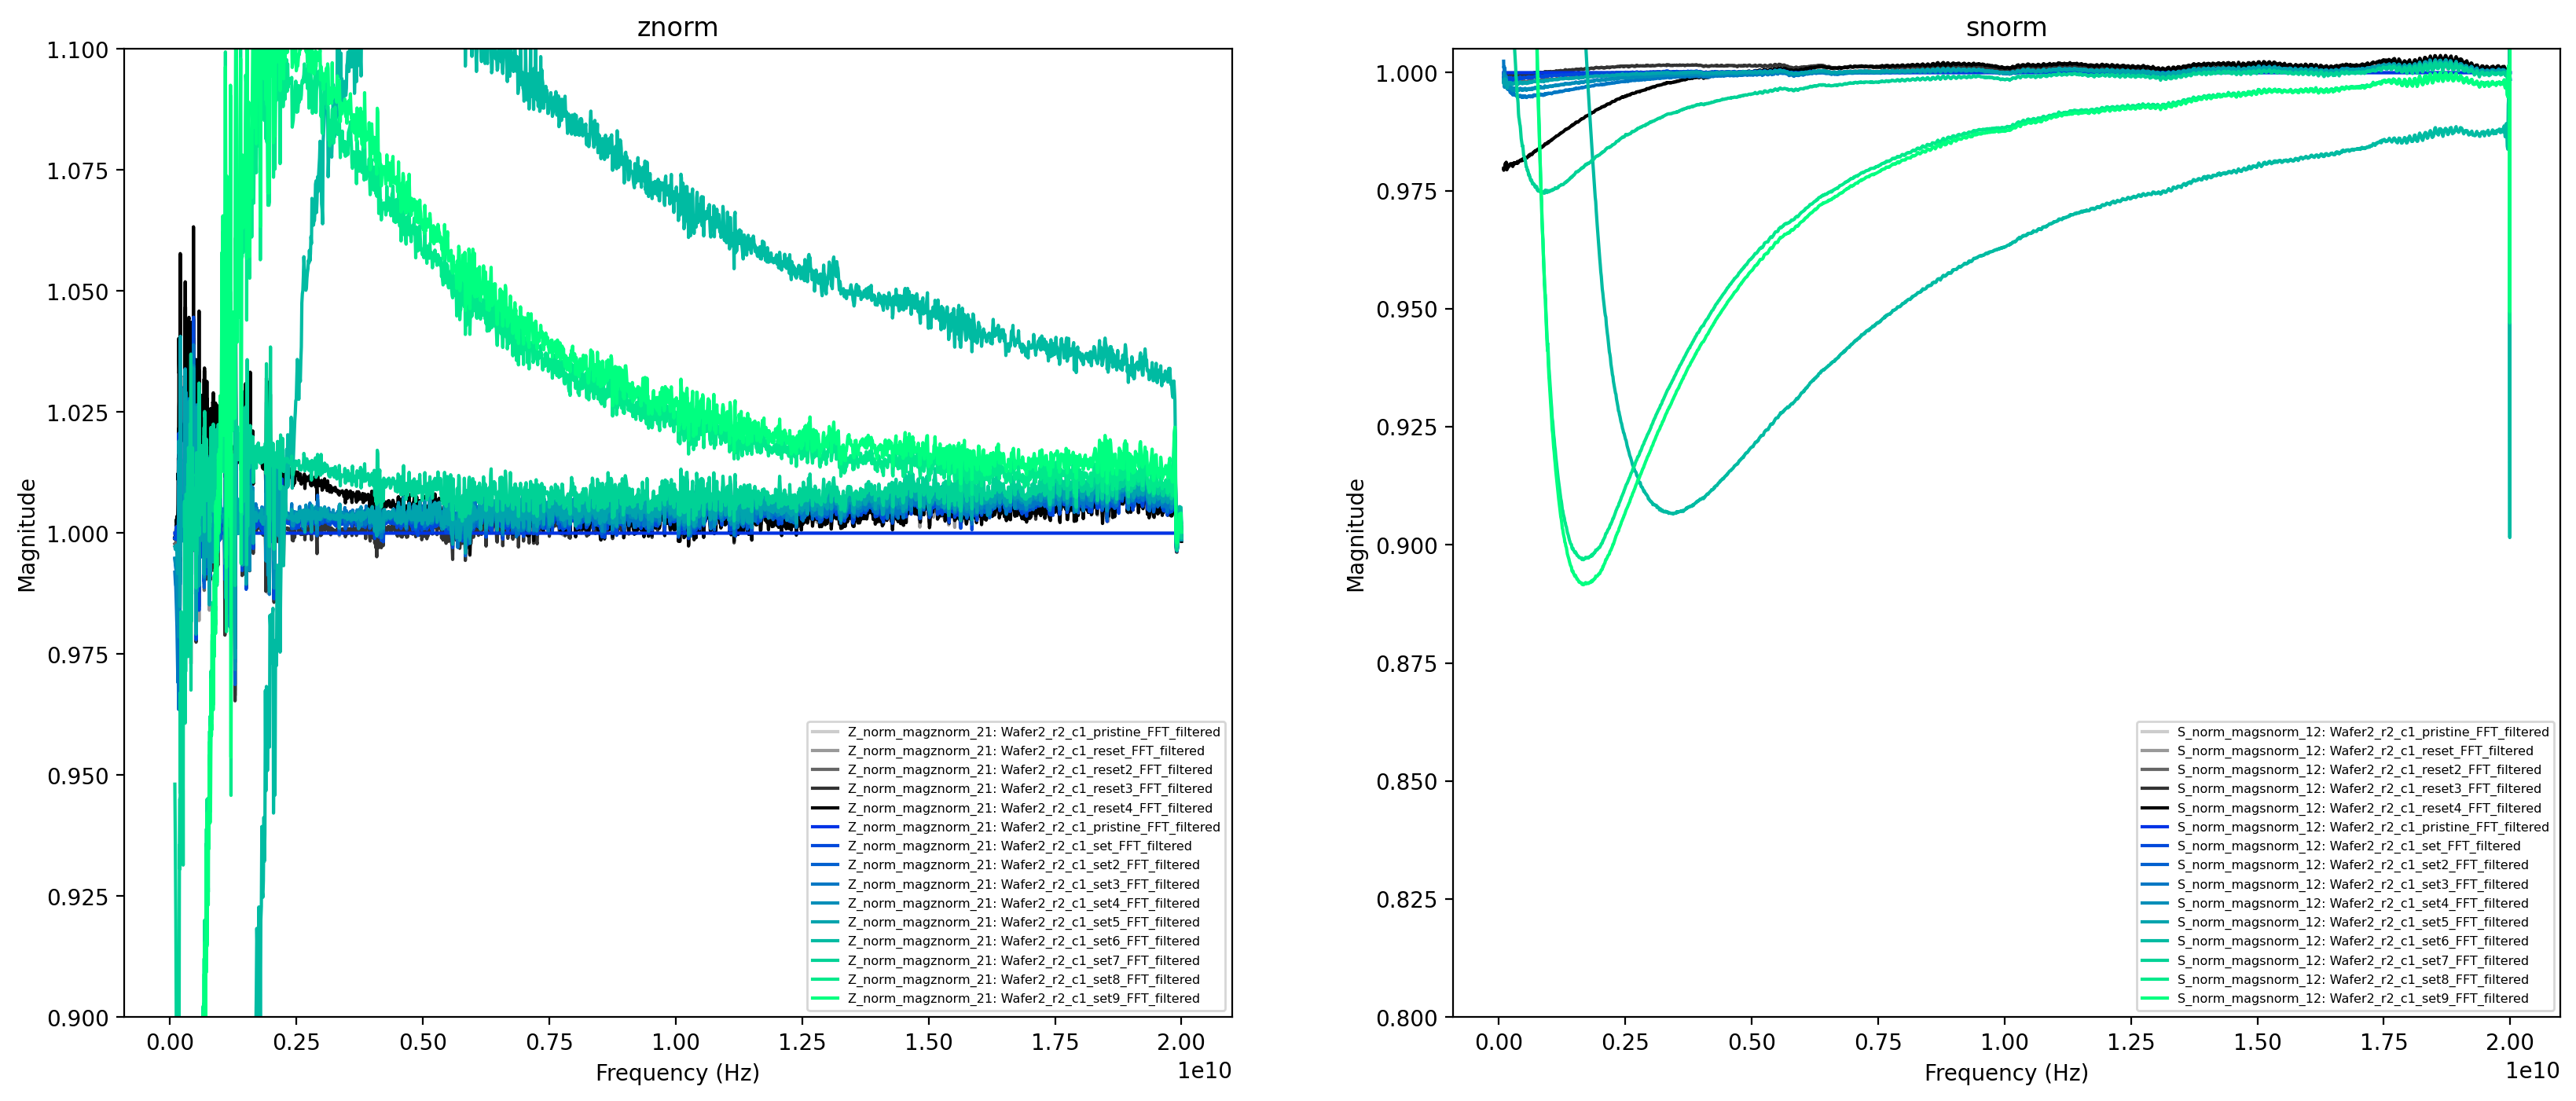

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[ [23,56,60,64,67], [23,57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )

# Plot the SET/RESET data in z norm and s norm
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

#Z norm plot
sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['znorm'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.9,1.1],x_range='0.1-20ghz',cal_in = OS_filt)
# S norm plot
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.98,1.005], x_range='0.1-20ghz',cal_in = TX_filt)

plt.show()

### Notes
- Clear visible difference in both Z_in and S_params for the Set/RESET devices across the frequency range

### Now let us compare the pristine DC bias measurements in the s-norm mode
- These are pristine devices with a DC bias applied
- Being compared to Eformed devices in SET/RESET

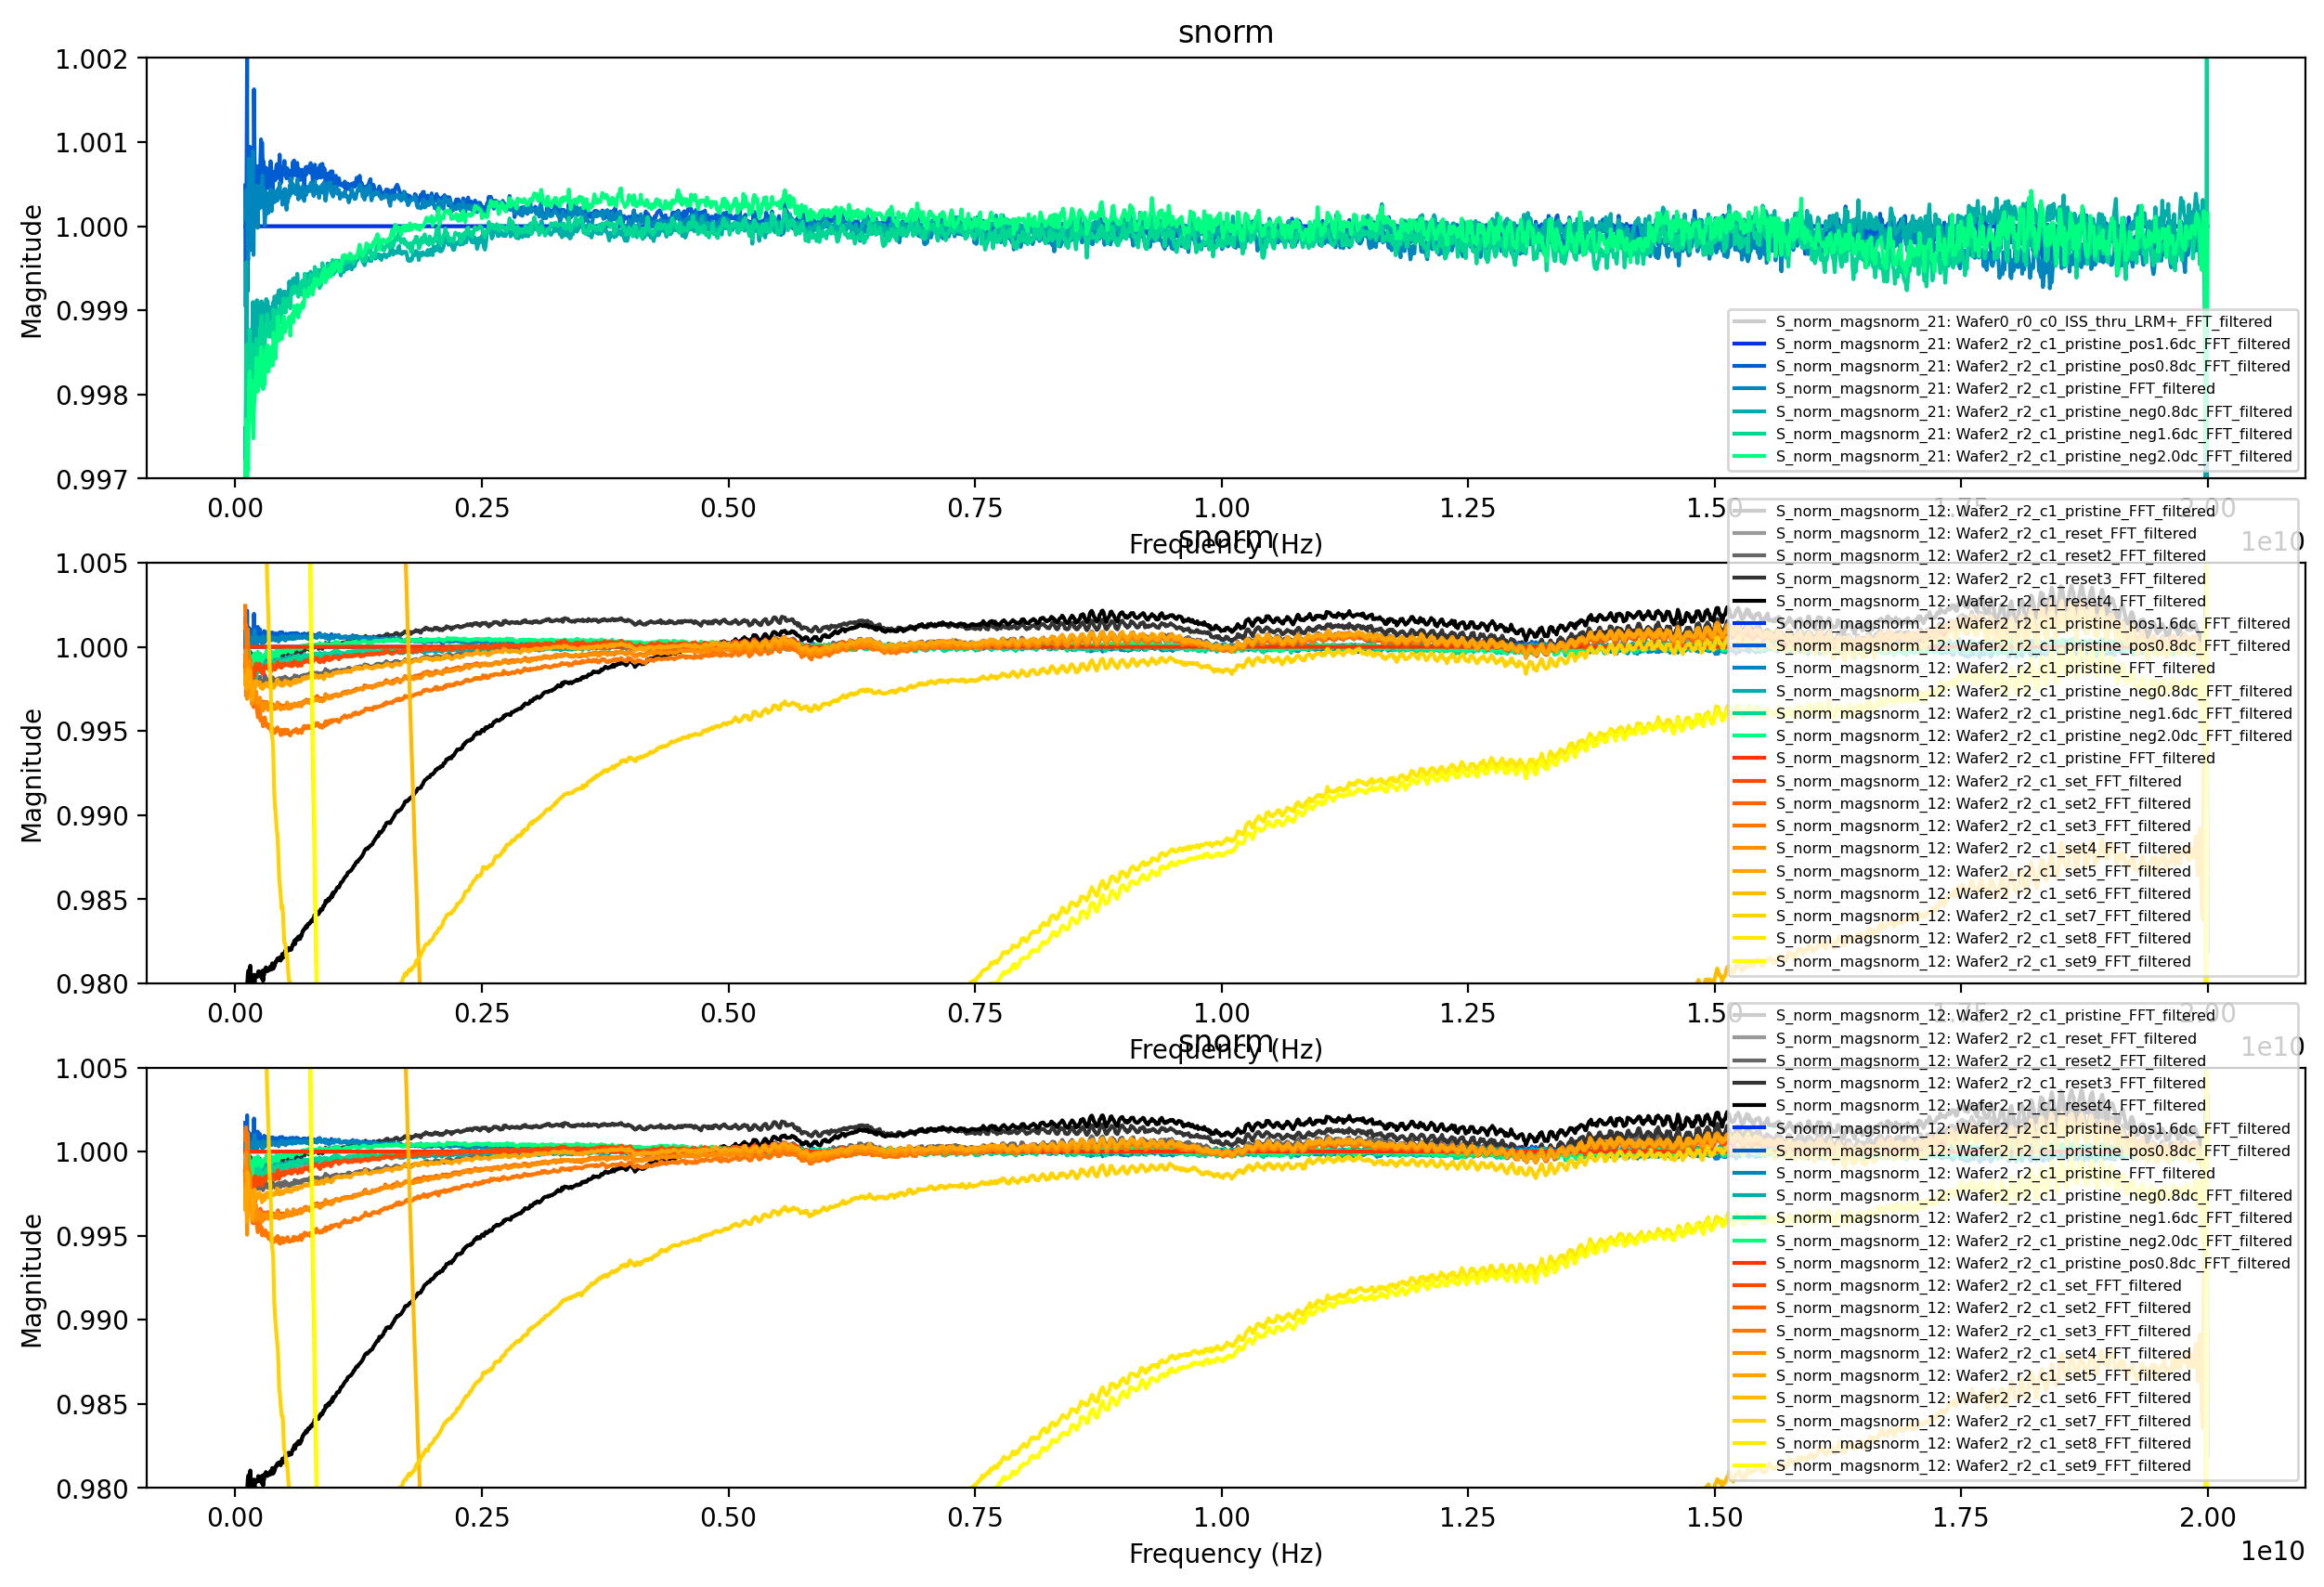

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[ [23,56,60,64,67], [31,27,23,35,39,41],[23,57,58,59,61,62,63,65,66,68] ]
run_n2 = [ [1], [31,27,23,35,39,41]]
run_n3 = [ [23,56,60,64,67], [31,27,23,35,39,41],[27,57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )
filtered_memristor2 = subgen(s2p_files_2_filt, run_nums = run_n2 )
filtered_memristor3 = subgen(s2p_files_2_filt, run_nums = run_n3 )

# Plot the FFT data with and without de embedding
f = plt.figure(figsize=(15,10),dpi=200)
gs = f.add_gridspec(3, 1)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[1, 0])
ax2 = f.add_subplot(gs[2, 0])

# Comparing the DC biases
sub_plot(ax=ax, dev_subset = filtered_memristor2, plot_type=['snorm'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.997,1.002],x_range='0.1-20ghz',cal_in = OS_filt)
# Comparing DC biases with switched states
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.98,1.005], x_range='0.1-20ghz',cal_in = OS_filt)
# DC biases, switched states but using a different 'pristine' object to normalise
sub_plot(ax=ax2, dev_subset = filtered_memristor3, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.98,1.005], x_range='0.1-20ghz',cal_in = OS_filt)

plt.show()

### Notes
- In plot 1 we can see that the DC biasing gives a slight shift in the s-params
    - Though this is incredibly slight and at the limit of the noise
- In plot 2 the DC bias are shown in blue-green with the HRS in greys and the LRS in yellow-orange
- Plot 3 is the same as plot 2 but the normalisation device is changed from pristine, to pristine_DC=0.2V
    - The reason for this is that I wanted to see if the small peaks are a product of normalisation or a consistent difference between pristine/formed devices
    - It appears that there are small localised frequency variations between pristine/formed
    - These may be real features of interest if consistent across other devices and not a product of data processing

### Comparing SET(LRS)/RESET(HRS)

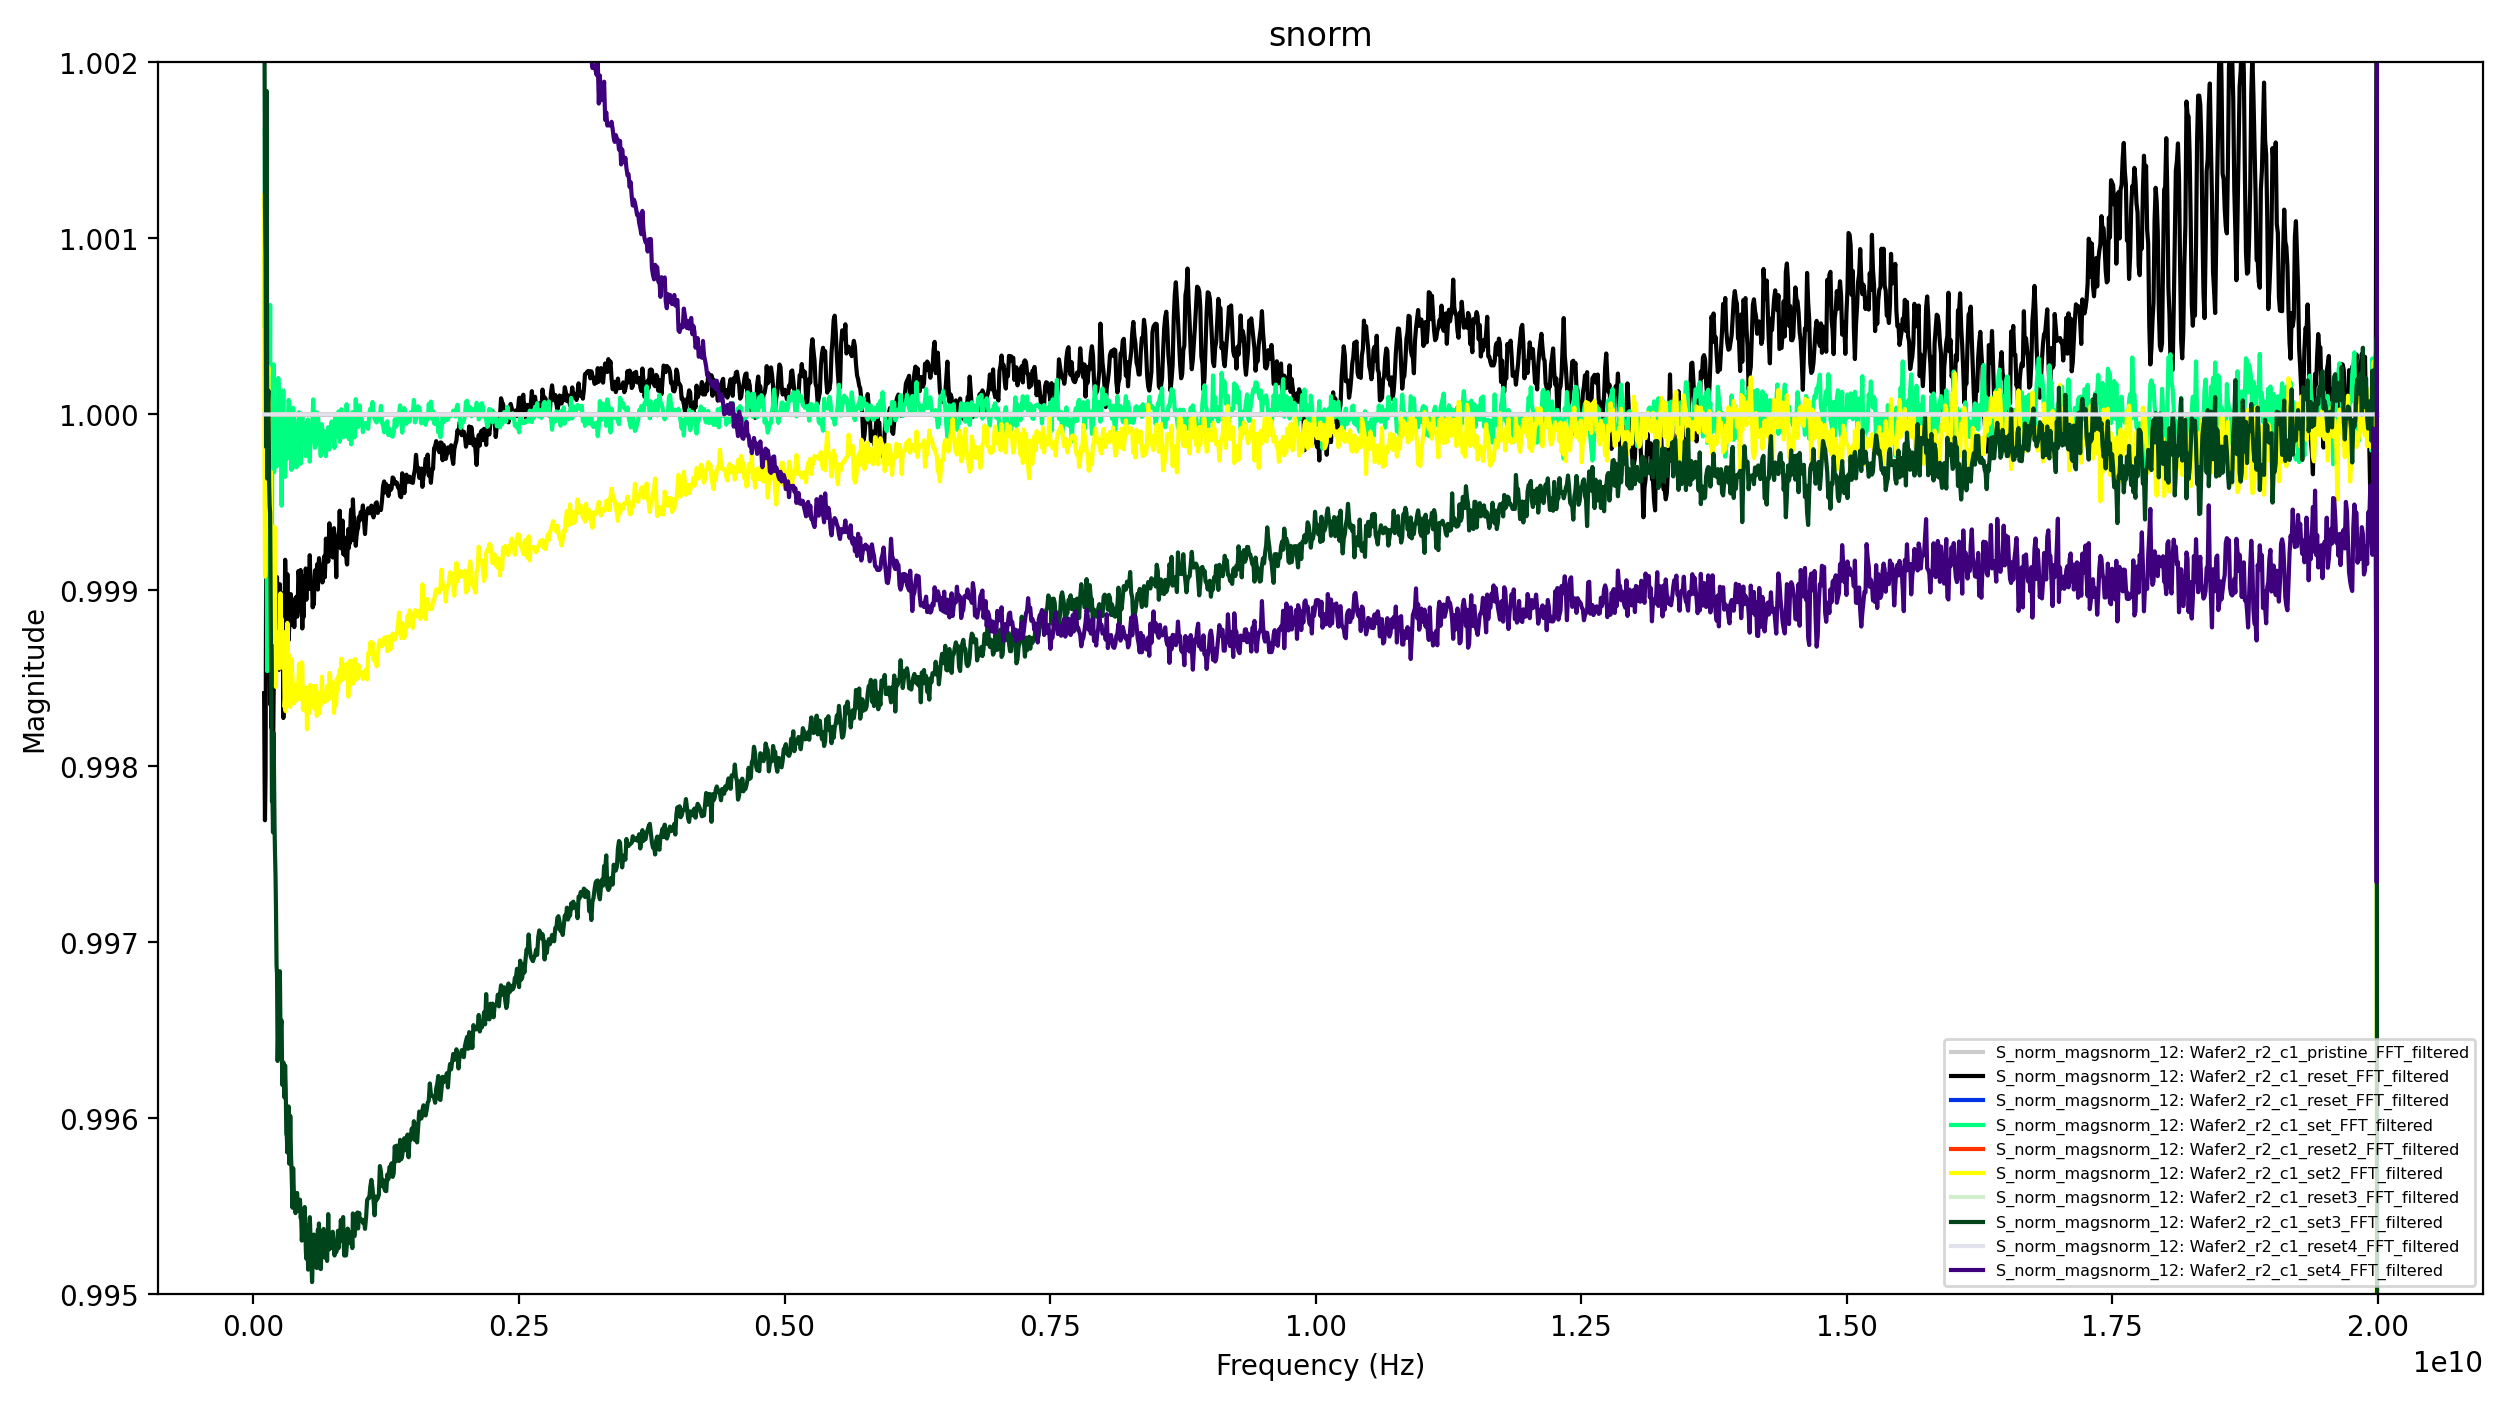

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[ [23,56,60,64,67],[23,57,58,59,61,62,63,65,66,68] ]
#pairs of set/reset to compare
run_n2 = [ [23,56],[56,57],[60,58],[64,59],[67,61] ]

filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )
filtered_memristor2 = subgen(s2p_files_2_filt, run_nums = run_n2 )

# Plot the pairs of SET/RESET data
f = plt.figure(figsize=(15,8),dpi=200)
gs = f.add_gridspec(1, 1)
ax = f.add_subplot(gs[0, 0])



# Comparing SET/RESET device pairs
sub_plot(ax=ax, dev_subset = filtered_memristor2, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.995,1.002], x_range='0.1-20ghz',cal_in = OS_filt)


plt.show()

### Notes
- These plot have pairs of normalised data where in general the RESET is a flat line and the SET is normalised to that RESET
- Thus the plots that deviate from the flat line are showing the differences induced by Setting the device
- Generally the SET(LRS have lower s21 reflecting lower r? but also changes in c?)
- the first pair of data in grey are pristine vs reset and the spike at 10GHz and a few other places are visible
- These spikes arent visible from SET to RESET implying that if these spikes are created in the forming they are not altered in the SET/RESET process


## DC biasing After Forming

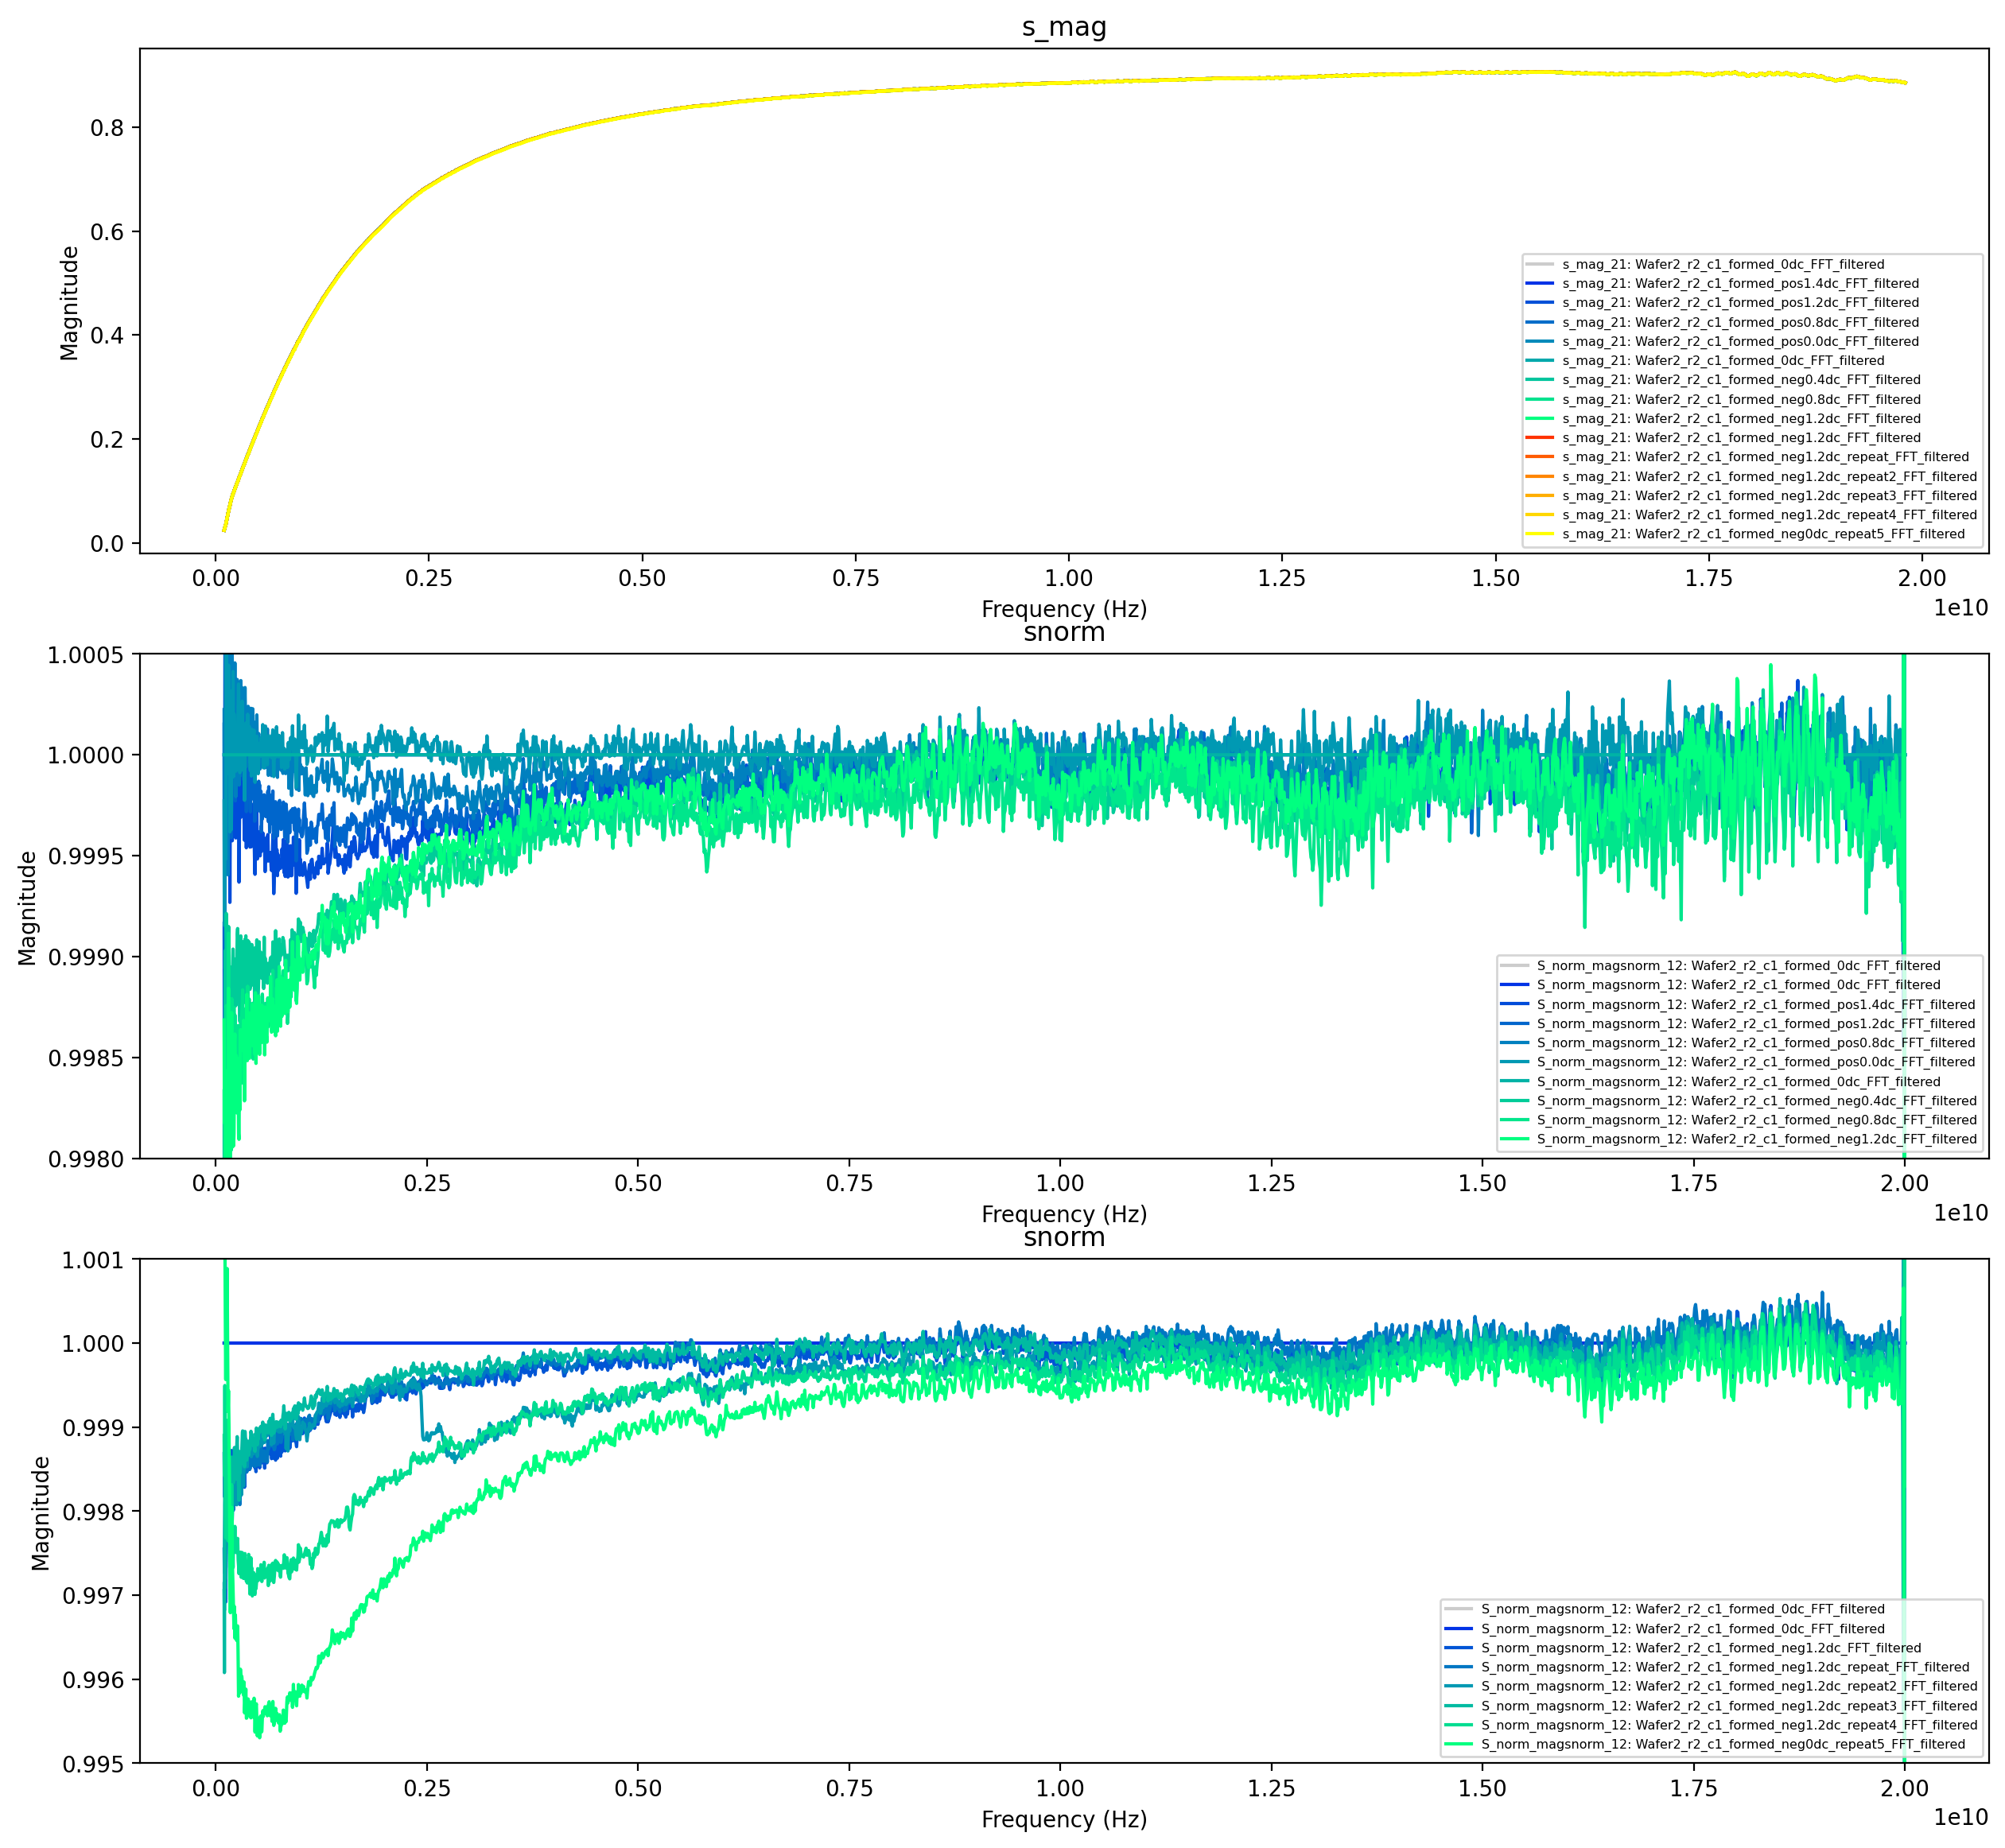

In [ ]:
# Select the DC bias data - first set is pristine, second is dc sweep, third set is held on max negative with one repeat 0dc at end
run_n =[[42],[ 47, 46, 45, 43, 42, 48, 49, 50],[50,51,52,53,54,55]]
# First look at the DC bias data
run_n2 =[[42],[42, 47, 46, 45, 43, 42, 48, 49, 50],]
# Now look at "edge of forming" data
run_n3 =[[42],[42,50,51,52,53,54, 55]]

filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )
filtered_memristor2 = subgen(s2p_files_2_filt, run_nums = run_n2 )
filtered_memristor3 = subgen(s2p_files_2_filt, run_nums = run_n3 )

# Plot the s params and the normalised s data
f = plt.figure(figsize=(15,14),dpi=200)
gs = f.add_gridspec(3, 1)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[1, 0])
ax2 = f.add_subplot(gs[2, 0])


# S params for all DC bias data 
sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = None,x_range='0.1-19.8ghz',cal_in = OS_filt)
# Comparing DC bias sweep
sub_plot(ax=ax1, dev_subset = filtered_memristor2, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.998,1.0005], x_range='0.1-20ghz',cal_in = OS_filt)
# Holding on edge of switching and repeating the VNA measurement
sub_plot(ax=ax2, dev_subset = filtered_memristor3, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.995,1.001], x_range='0.1-20ghz',cal_in = OS_filt)


plt.show()

### Notes
- First plot shows s-params are very consistent with DC and don't change a lot
- Second plot shows that in stable device range the DC gives a subtle systematic shift to the S-params
- Third plot shows that when DC bias is held at edge of switching device starts to switch and s-params change more dramatically
    - notably the last measurement is a repeat on 0V DC after the other measurements to show the permenant change in the devices state

# Old Code Ignore below...

In [ ]:



# # Step 0 - check fourier filter on a thru calibration and a device to compare the frequency spikes

# threshold_values = [[1.8e-8,2.2e-8],[5.9e-8,6.15e-8],[3.9e-8,4.05e-8],[2.9e-8,3.05e-8],[7.95e-8,8.05e-8],[6.45e-8,6.55e-8],[6.96e-8,7.06e-8]]
# ISS_filt_test = [copy.deepcopy(s2p_files[0])]
# s2p_filt = fourier_filter(ISS_filt_test, threshold = threshold_values) 

# thru_filt_test = [copy.deepcopy(s2p_files[1])]
# s2p_filt = fourier_filter(thru_filt_test, threshold = threshold_values)

# pristine_filt_test = [copy.deepcopy(s2p_files[24])]
# s2p_filt = fourier_filter(pristine_filt_test, threshold = threshold_values)




# ## Step 1 - fourier filter the initial files to remove noise
# s2p_filt = copy.deepcopy(s2p_files)
# s2p_filt = fourier_filter(s2p_filt, threshold = threshold_values) #apply to deepcopy to avoid modifying the original data

# # Step 2 - check a fourier deconvolution of all the thru data 
# cal_thru = [s for s in s2p_filt if s.state == 'thru' and s.wafer_number != 0]
# s2p_filt_convolve = copy.deepcopy(s2p_files)
# s2p_filt_convolve = fourier_convolve(s2p_filt_convolve, cal_thru) #apply to deepcopy to avoid modifying the original data

# # Step 3 - what about a time domain deconvolution??
# cal_thru = [s for s in s2p_filt if s.state == 'thru' and s.wafer_number != 0]
# s2p_filt_inverse = copy.deepcopy(s2p_files)
# s2p_filt_inverse = fourier_inverse(s2p_filt_inverse, cal_thru) #apply to deepcopy to avoid modifying the original data




# # Group files by their state so I can plot and compare states
# pristine = [s for s in s2p_filt if s.state == 'pristine']
# formed = [s for s in s2p_filt if s.state in ['formed', 'smallform', 'fullform']]

# # Group files with the same [r_number, c_number] values together so I can plot each device in all its states on one graph
# # Stores a list of S2PFile objects for each device in a dictionary, "dev", with the key being the device's [r_number, c_number] values
# #thus dev['11'] will have all the data for the device in row 1 column 1
# dev = {}
# for s in s2p_files:
#     key = f"r{s.dev_row}c{s.dev_col}"
#     if key in dev:
#         dev[key].append(s)
#     else:
#         dev[key] = [s]





# #-------------------Subsetting-------------------
# #dev_subs = subgen(s2p_files, run_nums =[[1,2,3,4,5,6], [31,27,23,35,39,41], [47,42,50]   ] )
# #dev_subs_filt = subgen(s2p_filt, run_nums =[[1,2,3,4,5,6], [31,27,23,35,39,41], [47,42,50]   ] )
# #dev_subs = subgen(s2p_files, run_nums =[[1,2], [23], [42]   ] )

# dev_subs = subgen(s2p_files, run_nums =[[1,2,3,4,5,6], [56,60,64,67], [57,58,59,61,62,63,65,66,68]   ] )
# dev_subs_filt = subgen(s2p_filt, run_nums =[[1,2,3,4,5,6], [56,60,64,67], [57,58,59,61,62,63,65,66,68]   ] )
# dev_subs_convolve = subgen(s2p_filt_convolve, run_nums =[[1,2,3,4,5,6], [56,60,64,67], [57,58,59,61,62,63,65,66,68]   ] )
# dev_subs_inverse = subgen(s2p_filt_inverse, run_nums =[[1,2,3,4,5,6], [56,60,64,67], [57,58,59,61,62,63,65,66,68]   ] )
# #-------------------Plotting-------------------
# #def keyplot(OS, dev, dev_selection = None, sub_set = [], y_range = None,
#            # x_range = slice(0,-1), log_x = False, plot_type = 'S_db',m_port=[2], n_port=[1]):        
# #'inputz' - plots the input impedance of the device

# x_range_input = "0.02-20ghz"#slice(0,-1)#"0.02-0.8ghz" #
# y_range_input = None#[0,200]#None#[0,200]
# # def subplot(dev_subs = [], cal_in = [], y_range = None,
# #             x_range = slice(0,-1), log_x = False, plot_type = 'S_db',m_port=[2], n_port=[1], deembed_data = True):

# # def subgen(s2p_files, run_nums = [[],[],[]]):




# # fig1 = subplot(dev_subs = dev_subs, cal_in = OS, plot_type = ['power', 'inputz', 'S_db'],
# #                         log_x=False, m_port=[2], n_port=[1],deembed_data = True, y_range=y_range_input, x_range=x_range_input)
# # fig2 = subplot(dev_subs = dev_subs, cal_in = OS, plot_type = ['power', 'inputz', 'S_db'],
# #                         log_x=False, m_port=[2], n_port=[1],deembed_data = False, y_range=y_range_input)


# # fig3 = subplot(dev_subs = dev_subs_filt, cal_in = TX, plot_type = ['s_mag','s_deg'],
# #                         log_x=False, m_port=[2], n_port=[1],deembed_data = True, y_range=y_range_input, x_range=x_range_input)
# # fig3 = subplot(dev_subs = dev_subs_filt, cal_in = OS, plot_type = ['s_mag','s_deg'],
# #                         log_x=False, m_port=[2], n_port=[1],deembed_data = True, y_range=y_range_input, x_range=x_range_input)
# fig4 = subplot(dev_subset = dev_subs, cal_in = OS, plot_type = ['s_mag'],
#                         log_x=False, m_port=[2], n_port=[1],deembed_data = False, y_range=y_range_input, x_range=x_range_input)
# fig4 = subplot(dev_subset = dev_subs_filt, cal_in = OS, plot_type = ['s_mag'],
#                         log_x=False, m_port=[2], n_port=[1],deembed_data = False, y_range=y_range_input, x_range=x_range_input)

# fig4 = subplot(dev_subset = dev_subs_convolve, cal_in = OS, plot_type = ['s_mag'],
#                         log_x=False, m_port=[2], n_port=[1],deembed_data = False, y_range=y_range_input, x_range=x_range_input)

# fig5 = subplot(dev_subset = dev_subs_inverse, cal_in = OS, plot_type = ['s_mag'],
#                         log_x=False, m_port=[2], n_port=[1],deembed_data = False, y_range=y_range_input, x_range=x_range_input)

# plt.show()


In [ ]:
#-------------------Network Set-------------------
#takes a dictionary or list of networks as its input and converts to a network set object that can give errors etc for repeated measurements
# Convert the dev dictionary of lists of s2p files into a dictionary of lists of networks

#need filtering, probably taken from the keyplot function to select the devices and states to include in the network set
# probably actually just want to make this another keyplot function that takes the network set as an input and then plots the data

# dev_networks = {}
# for key, value in dev.items():
#     dev_networks[key] = [s.network for s in value]

# ro_ns = NetworkSet(dev_networks, name='ro set')
